<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;a:link{color: white}">
    <h1 style='color:GhostWhite;'>Part 1: Should This Loan be Approved or Denied ?</h1>

An XGBoost v1.6+ data model to predict whether a loan can be approved or denied.

Optuna hyperparameter tuning for the XGBoost model is in Part 2 => <a style="color:yellow" href="https://www.kaggle.com/code/josephramon/sba-optuna-xgboost-random-forest">Part 2</a><br>
    </div>

<div class="alert alert-block alert-success">  
    <b>Dataset Source</b><br><br>
    <a href="https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied">U.S. Small Business Administration (SBA) Dataset</a> - all information about the dataset can be found at this link<br><br>    
    *<i>Thanks to Hamza for his <a href="https://www.kaggle.com/code/hamzaghanmi/xgboost-hyperparameter-tuning-using-optuna/notebook">Notebook on Optuna</a> which was used as a guide.</i> 
<br><br>
    If interested, Data Exploratory Visualization in Tableau can also be seen at :<br>
    <a href= "https://public.tableau.com/app/profile/joseph8038/viz/SBADatasetVisualizationandAnalysis/SBADatasetVisualizationandAnalysis-StoryBoard">SBA Data Exploratory Visualization in Tableau</a>
</div>

<div class="alert alert-block alert-info" style="color:DarkSlateBlue">
This notebook is divided into 2 main parts:<br>
<ul>
<li><a style="color:DarkSlateGrey;" href="#part1"><b>1. Pipeline</b></a> - this is the end result encapsulated into a pipeline</li><br>
<li><a style="color:DarkSlateGrey" href="#part2"><b>2. Data Exploration (EDA) and Preparation, Modeling, Metrics</b></a> - from start to end, with some notes</li>
</ul>
"Our model results are way more dependent on how well feature engineering is performed than on the model itself. Machine Learning models are like very skilled linguists that can decipher any text in any language. However, it will not be helpful if they are handed a bunch of scribbles or blurred out text. EDA should not be skipped, as a thorough EDA and feature engineering process accounts for 90% of the results of a good model."<br><br>
One method of avoiding memory leaks is doing processing inside a function. It creates a new scope for the intermediate variables and removes them automatically when the interpreter exits the function; hence, most of the code below are encapsulated into functions for this purpose. 
</div>

<a id="toc"></a>
<h2>Table Of Contents</h2>
<ul>
    <li><a style="color:DarkSlateGrey" href="#paths_and_flags">Paths and Flags</a></li>
    <li><a style="color:DarkSlateGrey" href="#libraries">Libraries</a></li>   
    <li><a style="color:DarkSlateGrey" href="#custom_functions">Custom Functions</a></li>
    <li><a style="color:DarkSlateGrey" href="#custom_classes">Custom Classes</a></li>
    <li><a style="color:DarkSlateGrey" href="#xgboost_class">XGBoost Class</a></li>
    <br>
    <li><a style="color:DarkSlateGrey" href="#part1">Part 1. PipeLine</a></li>
    <ul>
        <li><a style="color:DarkSlateGrey" href="#pl_classes">Pipeline Classes</a></li>
        <li><a style="color:DarkSlateGrey" href="#load_pl_df">Load Dataset for PipeLine</a></li>
        <li><a style="color:DarkSlateGrey" href="#pl_run">Run the pipeline</a></li>
    </ul>
    <br>
    <li><a style="color:DarkSlateGrey" href="#part2">Part 2. Data Exploration and Preparation, Modeling, Metrics</a></li>
    <ul>
        <li><a style="color:DarkSlateGrey" href="#de_load_df">Load Dataset</a></li>
        <li><a style="color:DarkSlateGrey" href="#dep">Data Exploration / Preparation</a></li>
        <li><a style="color:DarkSlateGrey" href="#build_model">Build Model Using XGBoost</a></li>
        <ul>
            <li><a style="color:DarkSlateGrey" href="#model1">Model v1</a></li>
            <li><a style="color:DarkSlateGrey" href="#model2">Model v2 : Undersample</a></li>
            <li><a style="color:DarkSlateGrey" href="#model3">Model v3 : Oversample</a></li>
        </ul>
        <li><a style="color:DarkSlateGrey" href="#test_model">Test Model</a></li>
        <ul>
            <li><a style="color:DarkSlateGrey" href="#test_test_dataset">Test Model With Test Dataset</a></li>
           <li><a style="color:DarkSlateGrey" href="#test_user_input">Test Model With User Input</a></li>
        </ul>
        <li><a style="color:DarkSlateGrey" href="#mutual_info">Mutual Information Scores</a></li>
        <li><a style="color:DarkSlateGrey" href="#trim_datasets">Trim Datasets</a></li>
        <li><a style="color:DarkSlateGrey" href="#results1">Full or Trimmed Dataset</a></li>
    </ul>  
    <br>
    <li><a style="color:DarkSlateGrey;font-size:18px" href="https://www.kaggle.com/code/josephramon/sba-optuna-xgboost-random-forest" target="_blank">Optuna Hyperparameter Tuning - <i style='font-size:13px'>this will open a new browser tab</i></a></li>
</ul>

<a id="paths_and_flags"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Paths and Flags</b></div>

In [270]:
import os
'''
kaggle_flag :
   0 - if running outside Kaggle (e.g. Jupyter Notebook), change inputdir & workdir to your 
       own path
   1 - if running as a Kaggle notebook
'''
# Change this logic to your own if needed
if os.path.exists('../usr/lib/myfuncs/myfuncs.py'):
    kaggle_flag = 1
    print('Running a Kaggle notebook')
else:
    kaggle_flag = 0
    print('Not running a Kaggle notebook')
    
# alert_flag - change to 0 for no sound alert, 1 for sound alert after long running cells
alert_flag = 0

# GPU is automatically detected if activated

#---------------------------------------------------------------------------------------#

if kaggle_flag == 1:             # Kaggle
    inputdir  = "../input/should-this-loan-be-approved-or-denied/"
    workdir  = "./"
    final_ds  = '../input/sba-xgboost-model/sba_final.csv.feather'  
    final_csv = '../input/sba-xgboost-model/sba_final.csv'          
    functions_path = "../usr/lib/myfuncs/myfuncs.py"
else:
    inputdir  = "C:\\Python\\Python_Data_Science_Exercises\\datasets\\"
    workdir  = "C:\\Python\\Python_Data_Science_Exercises\\datasets\\"
    final_ds  = f'{workdir}sba_final.csv.feather'
    final_csv = f'{workdir}sba_final.csv'
    functions_path = 'C:\\Python\\Python_Data_Science_Exercises\\mylibs\\'

audio_path="https://www.soundjay.com/misc/sounds/tablet-bottle-1.mp3" # for alert

print(f'kaggle_flag : {kaggle_flag}')
print(f'alert_flag  : {alert_flag}')

Not running a Kaggle notebook
kaggle_flag : 0
alert_flag  : 0


<a id="libraries"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Libraries</b></div>

In [271]:
# to be able to use clear_output(wait=True)
from IPython.display import clear_output 

def install_packages():
    print('Please wait, package installations started, if needed')
    libs = ['scikit-learn', 'seaborn', 'numpy','matplotlib', 'tensorflow','torch','joblib',
            'psutil','imbalanced-learn','xgboost','pyttsx3', 'pandas-profiling','sweetviz']
    
    piplist = !pip3 list
    for i in range(len(libs)):
        if not piplist.grep(libs[i]):
            !pip3 install {libs[i]}
        #
        # Since XGBoost version must be at least 1.6 for our code to work properly, 
        # we upgrade it here if needed, before we import it
        #
        elif libs[i] == 'xgboost':
            s = (piplist.grep('xgboost'))[0]
            s = " ".join(s.split())
            ver = s.split(" ")
            if ver[1] < '1.6':
                !pip3 install --upgrade xgboost
            
    clear_output(wait=True)
    print('Package installations completed')

install_packages()

Package installations completed


In [272]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import pyttsx3
from IPython.display import Audio, display
from IPython.display import FileLink
from IPython.display import IFrame
from IPython.core.display import HTML
import hashlib
import copy                     # for deepcopy()
import datetime as dt
import gc
from pandas_profiling import ProfileReport
import sweetviz as sv
import shutil
import psutil
import os
import sys

import joblib
import torch             # for clearing GPU cache
from time import sleep
import importlib

import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
'''
We can use these other packages for oversampling, or combined over/under sampling, 
but they are super slow with large datasets.  It will take 7 to 8 hours just for our 
X_train dataset
''' 
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
#from imblearn.over_sampling import ADASYN
#from imblearn.combine import SMOTETomek

from collections import Counter
from sklearn.model_selection import train_test_split

%matplotlib inline

warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")

clear_output(wait=True)
print('Package imports completed')

Package imports completed


In [273]:
'''
This check is mainly for Kaggle which has an older version of XGBoost, as at Apr 2022

XGBoost version should be at least 1.6.  From XGBoost 1.6, early_stopping_rounds and 
eval_metric are now under hyperparameters, and deprecated from fit() method.
'''
assert xgboost.__version__ >= '1.6',\
    "XGBoost version must be at least 1.6. RESTART KERNEL if already upgraded."

print(f'XGBoost __Version__ : {xgboost.__version__} is good.')
print()
!pip3 show xgboost

XGBoost __Version__ : 1.6.1 is good.

Name: xgboost
Version: 1.6.1
Summary: XGBoost Python Package
Home-page: https://github.com/dmlc/xgboost
Author: 
Author-email: 
License: Apache-2.0
Location: c:\programdata\anaconda3\lib\site-packages
Requires: numpy, scipy
Required-by: autoxgb


<a id="custom_functions"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Custom Functions</b></div>

In [274]:
sys.path

['C:\\Python\\Python_Data_Science_Exercises',
 'C:\\ProgramData\\Anaconda3\\python38.zip',
 'C:\\ProgramData\\Anaconda3\\DLLs',
 'C:\\ProgramData\\Anaconda3\\lib',
 'C:\\ProgramData\\Anaconda3',
 '',
 'C:\\Users\\latri\\AppData\\Roaming\\Python\\Python38\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Python\\Python_Data_Science_Exercises\\mylibs\\']

In [275]:
# import custom functions
# rerun this cell if any changes are made to myfuncs.py during the current session

if functions_path not in sys.path:
    sys.path.append(functions_path)
import myfuncs as mf
importlib.reload(mf)      # in case changes were made to myfuncs during current session
print('Custom functions import completed')

Custom functions import completed


<div class="alert alert-block alert-info">
<b>Some custom functions and classes in <a style="color:ForestGreen" href="https://www.kaggle.com/code/josephramon/myfuncs" target="_blank">myfuncs.py</a></b>.  Not all are used in this notebook; and those used are called with a qualification "<b>mf.</b>".<br>  
In Kaggle, myfuncs.py is set up as a <b>Utility Script</b> in /usr/lib<br>
<ul>
    <li>is_kaggle_gpu_enabled()</li>
<li>clear_gpu(tree_method='gpu_hist')</li>
<li>reduce_mem_usage(df, print_info = True, use_float16=False)</li>
<li>runtime(rt1,rt2)</li>
<li>create_download_link(title = "Download ", filename = "data.csv")</li>
<li>GetRam()</li>
<li>convertFloatToDecimal(f=0.0, precision=2)</li>
<li>formatFileSize(size, sizeIn, sizeOut, precision=0)</li>
<li>check_cols_with_nulls(df)</li>
<li>check_infinity_nan(df, dfname)</li>
<li>fixvals(val)</li>
<li>model_eval(y_valid,predictions, cmDisplay=False)</li>
<li>plot_features(booster, figsize)</li>
<li>make_mi_scores(X, y)</li>
<li>plot_mi_scores(scores)</li>
<li>GetSweetVizReport(df, workdir, kaggle_flag)</li>
<li>SetVoice(kaggle_flag)</li>
<li>InitTPUStrategy()</li>
<li>ZipDir(zippath)</li>
<li>GetTimeZone()</li>
<li>class color
</div>

In [276]:
# ensure garbage collector is enabled
(gc.isenabled() == False) and gc.enable();

In [277]:
gpu_enabled = mf.is_kaggle_gpu_enabled()

if gpu_enabled == False:
    tree_method = 'hist'
else:
    tree_method = 'gpu_hist'

del gpu_enabled
gc.collect()

sleep(5)
clear_output(wait=True)
tree_method

'hist'

In [278]:
''' 
Set up voice object.  Used in different areas of notebook to indicate completion of long processes.
'''
engine = mf.SetVoice(kaggle_flag)

<i><a style="color:DarkSlateGrey" href="#toc">Back to Table Of Contents</a></i>

<a id="custom_classes"></a>
<div style="font-family: Trebuchet MS;background-color:PowderBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Custom Classes</b></div>

<a id="xgboost_class"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>XGBoost Class</b></div>

In [360]:
class process_model():  
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.X_train, self.y_train = None, None
        self.X_valid, self.X_test = None, None
        self.y_valid, self.y_test = None, None
        
        self.xg_model = None

        print(f'MIS_Status Count ->  1 : {Counter(y)[1]}, 0 : {Counter(y)[0]}')

    def osample(self, print_info = True, os_data = [1,0,0], os_class = 'ros'):
        '''
        #Resampling method
        os_data:
            os_data[0] : 1 to resample train data; otherwise, 0 
            os_data[1] : 1 to resample valid data; otherwise, 0
            os_data[2] : 1 to resample test data; otherwise, 0
        ''' 
        # oversample
        if os_class == 'sm':
            resample = SMOTE(sampling_strategy='minority', n_jobs = -1, random_state=48)
        # combined over and under sampling
        elif os_class == 'sme':
            resample = SMOTEENN(sampling_strategy='minority', n_jobs = -1, random_state=48)
        # undersample
        elif os_class == 'rus':
            resample = RandomUnderSampler(sampling_strategy='majority', random_state=48)
        # oversample
        else:
            resample = RandomOverSampler(sampling_strategy='minority', random_state=48) 
        
        rt1=dt.datetime.now()
            
        if print_info == True:
            print()
            print('X_train size : ', len(self.X_train))
            print('X_valid size : ', len(self.X_valid))
            print('X_test size  : ', len(self.X_test))
            
        # fit and apply the transform
        print()
        if os_data[0] == 1:
            print(f'{mf.color.bdgreen}Please wait, resampling train data{mf.color.end}')
            X_train_over, y_train_over = resample.fit_resample(self.X_train, self.y_train)
            
        if os_data[1] == 1:
            print(f'{mf.color.bdgreen}Please wait, resampling valid data{mf.color.end}')
            X_valid_over, y_valid_over = resample.fit_resample(self.X_valid, self.y_valid)
            
        if os_data[2] == 1:
            print(f'{mf.color.bdgreen}Please wait, resampling test data{mf.color.end}')
            X_test_over, y_test_over   = resample.fit_resample(self.X_test, self.y_test)

        # summarize class distribution
        if print_info == True:
            if os_data[0] == 1:
                print('\nBefore Resampling train -> 1 : {}, 0 : {}'.format(
                    Counter(self.y_train)[1], Counter(self.y_train)[0]))

                print('After Resampling  train -> 1 : {}, 0 : {}'.format(
                    Counter(y_train_over)[1], Counter(y_train_over)[0]))
            if os_data[1] == 1:
                print('\nBefore Resampling valid -> 1 : {}, 0 : {}'.format(
                    Counter(self.y_valid)[1], Counter(self.y_valid)[0]))

                print('After Resampling  valid -> 1 : {}, 0 : {}'.format(
                    Counter(y_valid_over)[1], Counter(y_valid_over)[0]))
            if os_data[2] == 1:
                print('\nBefore Resampling test -> 1 : {}, 0 : {}'.format(
                    Counter(self.y_test)[1], Counter(self.y_test)[0]))

                print('After Resampling  test -> 1 : {}, 0 : {}'.format(
                    Counter(y_test_over)[1], Counter(y_test_over)[0]))
  
        if os_data[0] == 1:
            self.X_train, self.y_train = X_train_over, y_train_over
            
        if os_data[1] == 1:
            self.X_valid, self.y_valid = X_valid_over, y_valid_over
            
        if os_data[2] == 1:
            self.X_test, self.y_test   = X_test_over, y_test_over
            
        print(f'\n{mf.color.bdblue}Resampling {mf.color.end}', end = '')
        rt2=dt.datetime.now()
        mf.runtime(rt1,rt2)
        
    # oversampling method
    def osample_Xy(self, print_info = True):
        print(f'{mf.color.bdgreen}Please wait, resampling data{mf.color.end}\n')
        # define oversampling strategy
        oversample = RandomOverSampler(sampling_strategy='minority') 

        if print_info == True:
            print('X size : ', len(self.X))
            print('y size : ', len(self.y))
            
        # fit and apply the transform
        X_over, y_over = oversample.fit_resample(self.X, self.y)

        # summarize class distribution
        if print_info == True:
            print(f'Before Oversampling -> 1 : {Counter(self.y)[1]}, 0 : {Counter(self.y)[0]}')
            print(f'After Oversampling  -> 1 : {Counter(y_over)[1]}, 0 : {Counter(y_over)[0]}')
        
        # update X and y with the oversampled results 
        self.X = X_over
        self.y = y_over
    
    def split_data(self, X_size = 0.7):   
        # Split Data into Train:Validate:Test
        
        # train_size=X_size
        # In the first step, we will split the data in training and remaining dataset
        self.X_train, X_rem, self.y_train, y_rem = train_test_split(self.X, self.y,
                                        stratify=self.y, train_size = X_size, random_state=48) 

        # Now since we want the valid and test size to be equal,
        # we have to define valid_size=0.5 (that is 50% of remaining data)
        # test_size = 0.5

        self.X_valid, self.X_test, self.y_valid, self.y_test = train_test_split(X_rem,y_rem,
                                        stratify=y_rem, test_size=0.5, random_state=48)
        
        return {'X_train':self.X_train, 'y_train':self.y_train,
                'X_valid':self.X_valid, 'y_valid':self.y_valid,
                'X_test':self.X_test, 'y_test':self.y_test}
    
    def split_data2(self, X_size = 0.8):   
        # Split Data into Train:Validate only
        
        # train_size=X_size
        self.X_train, self.X_valid, self.y_train, self.y_valid = train_test_split(
                self.X, self.y, stratify=self.y, train_size = X_size, random_state=48) 
        self.X_test, self.y_test = None, None

        return {'X_train':self.X_train, 'y_train':self.y_train,
                'X_valid':self.X_valid, 'y_valid':self.y_valid,
                'X_test':self.X_test, 'y_test':self.y_test}
        
    # Method to run model 
    # desc - description of metrics report
    def prep_run_model(self, desc='Metrics', cmDisplay=False, PipeLine_flag = False,
                hyperparams = {'n_estimators': 1000, 'learning_rate': 0.05, 'max_depth': 6,
                               'tree_method':tree_method, 'early_stopping_rounds':100,
                               'eval_metric':['logloss','error']}):
        
        # from XGBoost 1.6, early_stopping_rounds and eval_metric are now under parameters,
        # and deprecated from fit() method.
        # The default hyperparameters are conservative, to help avoid overfitting
        
        print()
        print(f"{mf.color.bold}Please wait, Fitting model can take time ...{mf.color.end}")
        
        '''
        XGBRegressor is for continuous target/outcome variables. These are often called 
        "regression problems."

        XGBClassifier is for categorical target/outcome variables. These are often called 
        "classification problems."
        '''
        
        if PipeLine_flag == True:
            # hyperparams is a result of Optuna hyperparameter tuning
            # the hyperparameters lean towards being conservative to help avoid overfitting
            hyperparams = { 'tree_method': tree_method,
                            'lambda': 0.023437933789759252,
                            'alpha': 0.005813454622750776,
                            'gamma': 0,
                            'colsample_bytree': 0.9,
                            'subsample': 1.0,
                            'learning_rate': 0.05,
                            'n_estimators': 1000,
                            'max_depth': 13,
                            'random_state': 48,
                            'min_child_weight': 1,
                            'early_stopping_rounds': 100.0,
                            'eval_metric': 'error'}
            
        self.xg_model = XGBClassifier(**hyperparams,use_label_encoder =False)
       
        #eval_setparam = [(self.X_train, self.y_train), (self.X_valid, self.y_valid)]
        eval_setparam = [(self.X_valid, self.y_valid)]
        
        self.xg_model.fit(self.X_train, self.y_train,  
                     eval_set = eval_setparam,
                     verbose=False)
        
        gc.collect()
        mf.clear_gpu()
 
        print("Fitting model completed.")
        print()
        print('Preparing Predictions')
    
        # Get predictions
        predictions = self.xg_model.predict(self.X_valid)
    
        print()
        print(f'{mf.color.underline}{desc}{mf.color.end}')

        #eval_results = mf.model_eval(self.y_valid, predictions, cmDisplay)
        eval_results = mf.model_eval2(self.xg_model,
                                      self.X_train, self.y_train,
                                      self.X_valid, self.y_valid,
                                      cmDisplay=True)
            
        # Return these values as they may be needed for further testing or metrics
        # in dictionary form to remember easier 
        return {'xg_model':self.xg_model,'predictions':predictions,
                'X_train':self.X_train, 'y_train':self.y_train,
                'X_valid':self.X_valid, 'y_valid':self.y_valid,
                'X_test':self.X_test, 'y_test':self.y_test, 'eval_results':eval_results}
    
print('class process_model initialized')

class process_model initialized


<i><a style="color:DarkSlateGrey" href="#toc">Back to Table Of Contents</a></i>

In [280]:
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')
plt.figure(dpi=300)
plt.style.use('Solarize_Light2')

print('Plotting defaults set up')

Plotting defaults set up


<Figure size 1800x1200 with 0 Axes>

<a id="part1"></a>
<div style="font-family: Trebuchet MS;background-color:DarkRed;color:AliceBlue;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
<h1 id="part1" style='color:GhostWhite;'>Part 1. Pipeline</h1>
This pipeline handles both X and y
</div>

<a id="pl_classes"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>PipeLine Classes</b></div>

In [281]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
  
class PL_Object():
    def __init__(self,X,y):
        #store X and Y
        self.X=X
        self.y=y

class PreProcessor(BaseEstimator, TransformerMixin):
    def __init__(self,operation= 'X'):
        self.operation=operation
    @staticmethod
    def enabled(**kwargs):
        return True

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # check the parameters and return X and y inside the object
        X_data=X.X
        y_data=X.y
        
        print()
        print(f'{mf.color.bdunl}PreProcessor initiated for {self.operation}{mf.color.end}')
        
        #  do some work and assign it back to the X object which contains both X and y data
        if self.operation=='X':
            '''
            # NOTE: 'MIS_Status' is the target (y), but still in X, as we need to drop rows
                    with NaNs. We cannot do it separately, as there will be a mismatch in count 
                    of rows.  At the end of this procedure, we separate the new target data from X 
                    and update y.
            '''
            
            # Drop Na from rows
            #---------------------
            print(f'{mf.color.bdblue}Drop Na{mf.color.end}')
            X_data.dropna(subset=['DisbursementDate', 'NewExist', 'City', 'State',
                        'LowDoc', 'Name', 'NAICS', 'CreateJob', 'RetainedJob', 'FranchiseCode',
                        'UrbanRural', 'NoEmp', 'Term', 'MIS_Status'], how='any', inplace=True)
            
            # drop invalid classifications
            print('   Drop invalid classifications')
            X_data = X_data[(X_data['LowDoc'] == 'Y') | (X_data['LowDoc'] == 'N')]
            
            X_data = X_data[(X_data['NewExist'] == 1) | (X_data['NewExist'] == 2)]   
            
            # Trim leading and trailing spaces
            #---------------------------------
            print('   Trim leading and trailing spaces, if any')
            X_data['City'] = X_data['City'].str.strip()
            
            # Change dtype for columns needed for calculation or string extraction 
            #------------------------------------------------------------------------
            print('{}Change dtype of columns used for calculation or string extraction{}'.format(
                    mf.color.bdgreen, mf.color.end)
                 )

            X_data = X_data.astype({'DisbursementGross':np.float64,'SBA_Appv':np.float64,
                              'GrAppv':np.float64, 'ChgOffPrinGr':np.float64,
                              'NAICS':np.str_, 'NewExist':np.int8})
            
            # Drop Duplicate Rows
            #------------------------------------------------------------------------
            print(f'{mf.color.bdblue}Drop Duplicate Rows{mf.color.end}')
            dupl_series = X_data.duplicated()
            num_of_dupl = len(X_data[dupl_series == True])
            if num_of_dupl > 0:
                X_data.drop_duplicates(inplace=True)
        
            # Create New Features
            #-----------------------
            print(f'{mf.color.bdblue}Create New Features{mf.color.end}')
            X_data['Industry'] = X_data['NAICS'].str[0:2]
            X_data = X_data.astype({'Industry':np.int8})
            
            X_data['Recession'] = np.where((X_data['DisbursementDate'] >= '2007-09-01')\
                     & (X_data['DisbursementDate'] <= '2009-06-30'), 1, 0)
            
            X_data['RealEstate'] = np.where(X_data['Term'] >= 240, 1, 0)
            
            X_data['SBA_Portion']=(X_data['SBA_Appv']/X_data['GrAppv']) * 100
            
            X_data["CityState"] = X_data["City"] + "_" + X_data["State"]
            
            print()
            print(f"X length = {len(X_data)}")
            print(f"Y length = {len(X_data['MIS_Status'])}")
            
            # Update X object
            X.X = X_data                      # type DataFrame
            X.y = X_data.pop('MIS_Status')    # type series
            
        elif self.operation=='y':
            pass                      
        else:
            pass
        
        #return modified X object
        return X
    

class EncodeCategorical(BaseEstimator, TransformerMixin):
    def __init__(self,operation= 'X'):
        self.operation=operation
    @staticmethod
    def enabled(**kwargs):
        return True

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # encode categorical features and return X and y inside the object
        X_data=X.X
        y_data=X.y
        
        print()
        print('{}Encode Categorical Features initiated for {}{}'.format(
                mf.color.bdunl, self.operation, mf.color.end)
             )
        
        #  do some work and assign it back to the X object
        if self.operation=='X':         
            X_data['LowDoc'] = np.where((X_data['LowDoc'] == 'Y'), 1, 0)
            
            len_data=len(X_data)
            #cols_to_drop = []
            hash_constant = 900000   # fixed value so we can programmatically reproduce the hash
            #for col in X_data.columns:
            for col in X_data[['State','CityState']]:
                if X_data[col].dtype == 'object':
                    print(f'Column {col} has {X_data[col].nunique()} values among {len_data}')

                    if X_data[col].nunique() < 25:
                        print(f'One-hot encoding of {col}')
                        one_hot_cols = pd.get_dummies(X_data[col])
                        for ohc in one_hot_cols.columns:
                            X_data[col + '_' + ohc] = one_hot_cols[ohc]
                    else:
                      print(f'Hashing of {col}')
                      X_data[col + '_hash'] = X_data[col].apply(lambda row: int(hashlib.sha1((col +\
                                "_" + str(row)).encode('utf-8')).hexdigest(), 16) % hash_constant)

            X.X = X_data
            
        elif self.operation=='y':
            y_data = np.where(y_data == 'P I F', 1, 0)
            
            y_data = y_data.astype(np.int8)
            
            # convert back to series
            y_data = pd.Series(y_data)

            X.y = y_data                      
        else:
            pass
        #return modified X
        return X    

class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self,operation= 'X'):
        self.operation=operation
    @staticmethod
    def enabled(**kwargs):
        return True

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_data=X.X
        
        print()
        print(f'{mf.color.bdunl}Drop Columns initiated for {self.operation}{mf.color.end}')
        
        #  do some work and assign it back to the X object
 
        # Dropping 'City' as 'CityState_hash' is more ideal
        # Zip code has invalid values like 1, 2.  If we pad 0000 to 1, it's still not correct,
        # as state should be Alaska. Zip code 1 is different states in the dataset
        cols_to_drop = ['LoanNr_ChkDgt', 'Zip', 'Bank', 'BankState', 'ApprovalDate',
                        'ApprovalFY', 'ChgOffDate', 'BalanceGross', 'NAICS', 'ChgOffPrinGr',
                        'Name', 'RevLineCr', 'DisbursementDate', 'City', 'State', 'CityState',
                        'GrAppv']

        X_data.drop(columns=cols_to_drop, inplace=True)
            
        print()
        print('Unneeded Columns Dropped')
        
        # reduce mem usage of X_data as final step
        X_data = mf.reduce_mem_usage(X_data)
        
        print()
        print(X_data.info())

        X.X = X_data
            
        #return modified X
        return X    

class XGBoost(BaseEstimator, TransformerMixin):
    def __init__(self,operation= 'X'):
        self.operation=operation
    @staticmethod
    def enabled(**kwargs):
        return True

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_data=X.X
        y_data=X.y
        
        print(f'\n{mf.color.bdunl}XGBoost initiated{mf.color.end}')
        
        # Get predictions using training and validation data
        xgp = process_model(X_data, y_data)
        xgp.split_data(0.7)
        xgp.osample(os_data=[1,0,0])
        
        xgp_results = xgp.prep_run_model("Train/Valid Data Metrics",
                                        cmDisplay=True, PipeLine_flag = True)   
        
        #Test with unseen data
        print(f'\n{mf.color.bdunl}Test With Unseen Data X_test and y_test{mf.color.end}')
        
        #xgp_model = xgp_results['xg_model']
        #X_test = xgp_results['X_test']
        #y_test = xgp_results['y_test']
        
        # Get predictions
        predictions = xgp.xg_model.predict(xgp.X_test)
        #cmv = mf.model_eval(xgp.y_test, predictions)
        cmv = mf.model_eval2(xgp.xg_model,
                             xgp.X_train, xgp.y_train,
                             xgp.X_test, xgp.y_test,
                             cmDisplay=True, prtstr = 'y_test')

        #X.X = X_data
            
        '''
        A dictionary is returned, and its values can be used outside the pipeline if needed
        
        {'xg_model':xg_model,'predictions':predictions,
                    'X_train':X_train, 'y_train':y_train,
                    'X_valid':X_valid, 'y_valid':y_valid,
                    'X_test':X_test, 'y_test':y_test, 'cmv':cmv}
        '''
        return xgp_results

print('Pipeline classes initialized')

Pipeline classes initialized


<i><a style="color:DarkSlateGrey" href="#toc">Back to Table Of Contents</a></i>

<a id="load_pl_df"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Load Dataset for PipeLine</b></div>

In [282]:
print('Loading dataset ...')
X = pd.read_csv(f'{inputdir}SBAnational.csv',
                 converters = {'DisbursementGross':mf.fixvals,'SBA_Appv':mf.fixvals,
                              'GrAppv':mf.fixvals, 'ChgOffPrinGr':mf.fixvals},
                              parse_dates=['DisbursementDate'], low_memory=False)
print("Shape of original SBA dataset : ", X.shape)
print()
display(X.info(memory_usage = 'deep'))
print()
display(X[['DisbursementGross','SBA_Appv','GrAppv','ChgOffPrinGr','DisbursementDate']].head(2))

# Filter data to before 2011
X = X[X['DisbursementDate'] <= '2010-12-31']

print()
print(f"Size of data after 2010-12-31 : \
    {len(X[X['DisbursementDate'] > '2010-12-31'])}")
print()
print(f"Size of data before 2011 : \
    {len(X[X['DisbursementDate'] < '2011-01-01'])}")

'''
X still contains the target 'MIS_Status', as we have to drop rows 
with NaNs in the pipeline. "MIS_Status" will be separated from X later in the pipeline

Select target - y is initialized as it goes into the pipeline, but will be updated in the pipeline 
after preprocessing.  Others preprocess y outside the pipeline; here, y will be preprocessed in
the pipeline.
'''
y = X['MIS_Status']

print(f"MIS_Status Count ->  P I F: {Counter(y)['P I F']}, CHGOFF: {Counter(y)['CHGOFF']}")

Loading dataset ...
Shape of original SBA dataset :  (899164, 27)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      899164 non-null  int64         
 1   Name               899150 non-null  object        
 2   City               899134 non-null  object        
 3   State              899150 non-null  object        
 4   Zip                899164 non-null  int64         
 5   Bank               897605 non-null  object        
 6   BankState          897598 non-null  object        
 7   NAICS              899164 non-null  int64         
 8   ApprovalDate       899164 non-null  object        
 9   ApprovalFY         899164 non-null  object        
 10  Term               899164 non-null  int64         
 11  NoEmp              899164 non-null  int64         
 12  NewExist           899028 non-nul

None

,DisbursementGross,SBA_Appv,GrAppv,ChgOffPrinGr,DisbursementDate
0,60000.00,48000.00,60000.00,0.00,1999-02-28
1,40000.00,32000.00,40000.00,0.00,1997-05-31



Size of data after 2010-12-31 :     0

Size of data before 2011 :     876993
MIS_Status Count ->  P I F: 719228, CHGOFF: 155990


<a id="pl_run"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Run the pipeline</b></div>


PreProcessor initiated for X
Drop Na
   Drop invalid classifications
   Trim leading and trailing spaces, if any
Change dtype of columns used for calculation or string extraction
Drop Duplicate Rows
Create New Features

X length = 868663
Y length = 868663

Encode Categorical Features initiated for X
Column State has 51 values among 868663
Hashing of State
Column CityState has 43153 values among 868663
Hashing of CityState

Encode Categorical Features initiated for y

Drop Columns initiated for X

Unneeded Columns Dropped
Memory usage of dataframe is 91.13 MB

Memory usage after optimization is: 38.11 MB
Decreased by 58.2%

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868663 entries, 0 to 899163
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Term               868663 non-null  int16  
 1   NoEmp              868663 non-null  int16  
 2   NewExist           868663 non-null  uint8  
 3   CreateJ

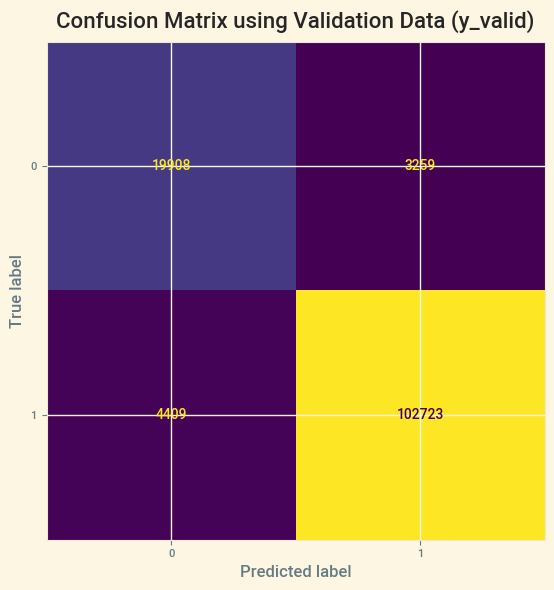

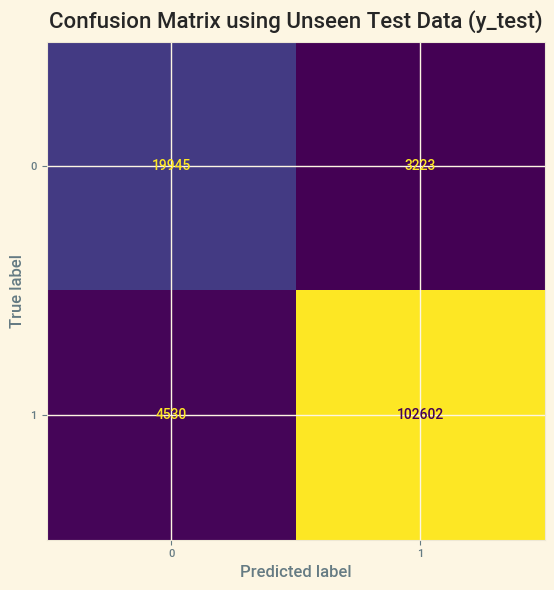

In [283]:
%%time

def RunPipeLine():
    rt1=dt.datetime.now()
    #Assign X and y to the object
    My_Object=PL_Object(X,y)

    #Build a simple pipeline
    My_Pipeline=Pipeline([('X Prep',PreProcessor('X')),
                          ('X EnCat',EncodeCategorical('X')),
                          ('y EnCat',EncodeCategorical('y')),
                          ('DropCols',DropColumns()),
                          ('XGBoost',XGBoost())
                         ])

    My_Object=My_Pipeline.transform(My_Object)

    print()
    print(f'{mf.color.bdred}These results were obtained using Optuna tuning{mf.color.end}')
    
    print()
    print(f'{mf.color.bold}Pipeline Process Completed.{mf.color.end}')

    rt2=dt.datetime.now()
    mf.runtime(rt1,rt2)
    print()
    
    del My_Pipeline
    gc.collect()
    
    return My_Object        # for further usage below
    
MyObject = RunPipeLine()

<div class="alert alert-block alert-info" style="color:DarkSlateBlue">
    <b>Just for informative reasons</b>, below shows how we can use data (dictionary) passed back by the pipeline to My_Object
    </div>      

dict_keys(['xg_model', 'predictions', 'X_train', 'y_train', 'X_valid', 'y_valid', 'X_test', 'y_test', 'eval_results'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999896 entries, 0 to 999895
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Term               999896 non-null  int16  
 1   NoEmp              999896 non-null  int16  
 2   NewExist           999896 non-null  uint8  
 3   CreateJob          999896 non-null  int16  
 4   RetainedJob        999896 non-null  int16  
 5   FranchiseCode      999896 non-null  int32  
 6   UrbanRural         999896 non-null  uint8  
 7   LowDoc             999896 non-null  uint8  
 8   DisbursementGross  999896 non-null  float32
 9   SBA_Appv           999896 non-null  float32
 10  Industry           999896 non-null  uint8  
 11  Recession          999896 non-null  uint8  
 12  RealEstate         999896 non-null  uint8  
 13  SBA_Portion        999896 non

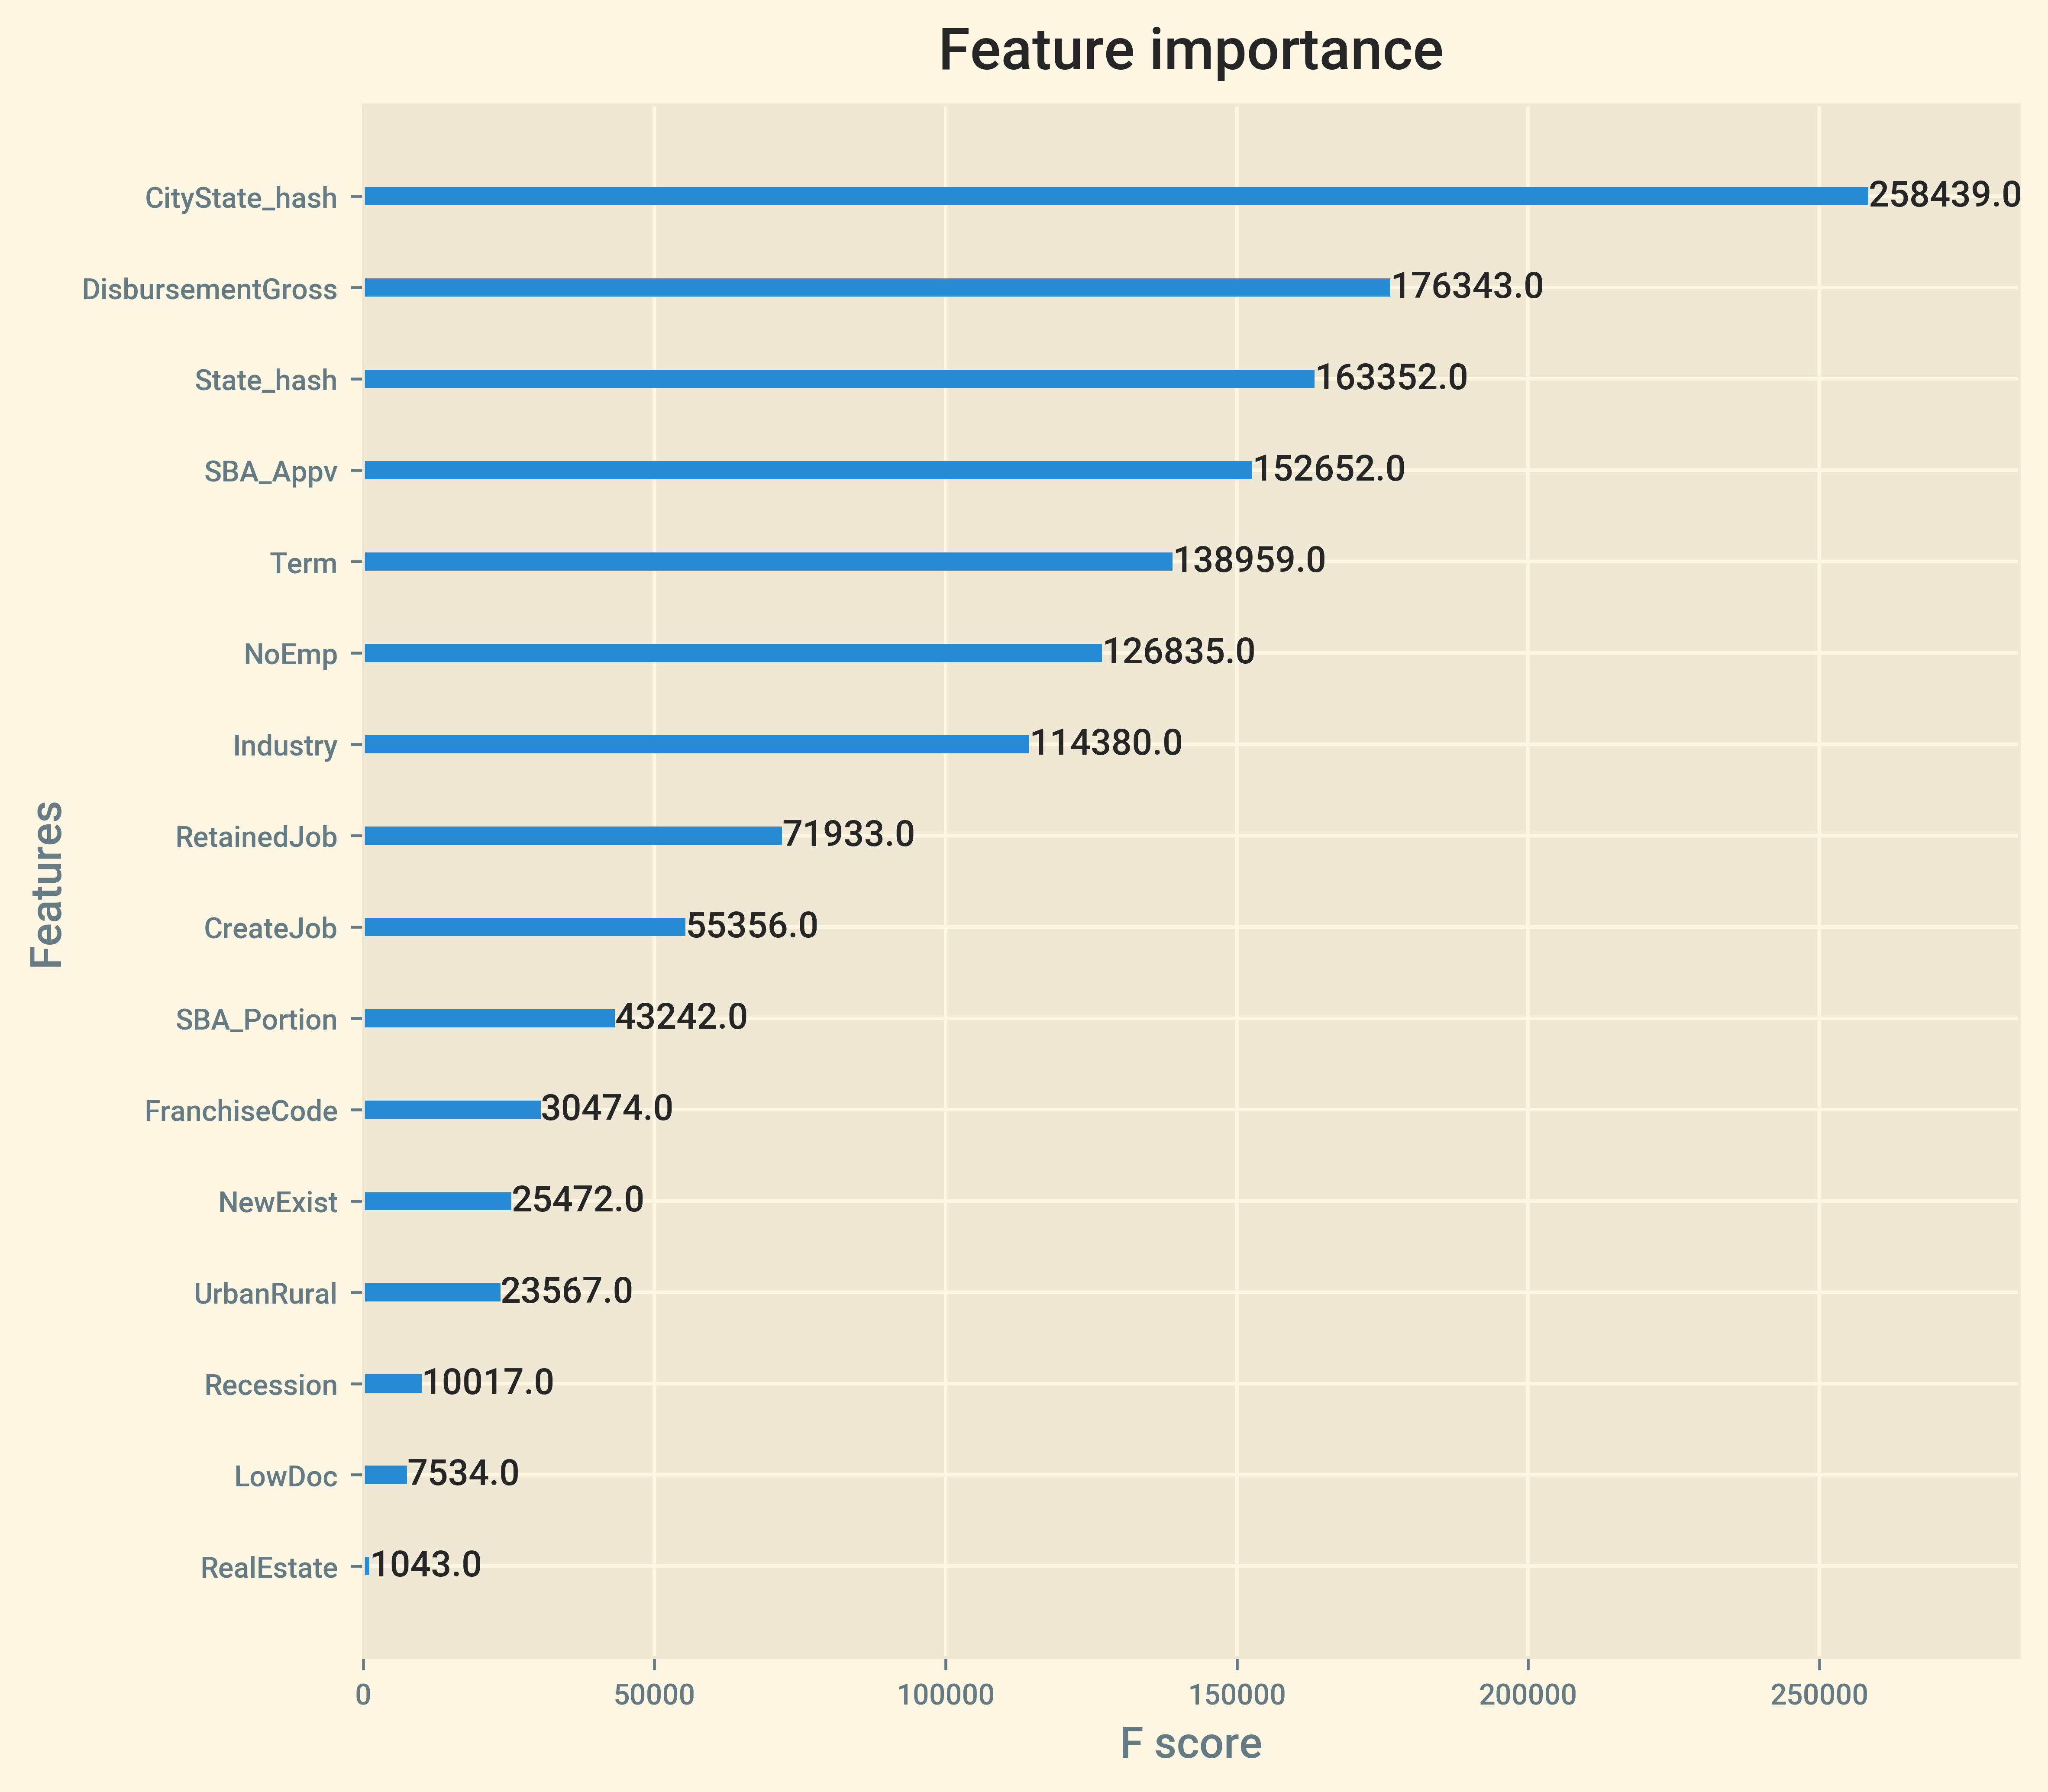

<Figure size 1800x1200 with 0 Axes>

In [285]:
def obj_sample_usage():
    print(MyObject.keys())
    pl_model = MyObject['xg_model']
    x=mf.plot_features(pl_model, (8,7))
    print()
    MyObject['X_train'].info()
    
obj_sample_usage()

In [286]:
# clear some variables from memory
del X, y
#del MyObject
gc.collect()

7121

In [287]:
if alert_flag == 1:
    if kaggle_flag == 0:   # not Kaggle
        engine.say("SBA Machine Learning PipeLine completed.")
        engine.runAndWait()
    else:
        display(Audio(url=audio_path, autoplay=True))

<i><a style="color:DarkSlateGrey" href="#toc">Back to Table Of Contents</a></i>

<a id="part2"></a>
<div style="font-family: Trebuchet MS;background-color:DarkRed;color:AliceBlue;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
<h1 style='color:GhostWhite;'>Part 2 : Data Exploration and Preparation, Modeling, Metrics</h1></div>

<a id="de_load_df"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
<h3 style='color:GhostWhite;'>1. Load Dataset</h3></div>

In [288]:
print('Loading dataset ...')
sba = pd.read_csv(f'{inputdir}SBAnational.csv', low_memory=False)

display(sba.info(memory_usage = 'deep'));

Loading dataset ...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-n

None

<a id="dep"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>2. Data Exploration / Preparation</h2><br>
    </div>

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Reload dataset with some conversion</b><br>
    After review, decided to reload dataset with conversion of some features that may be needed for calculation.  It could be done after loading, but this is for instructive purposes on how it's done.
    </div>

In [289]:
print('Loading dataset ...')
sba = pd.read_csv(inputdir + 'SBAnational.csv',
                 converters = {'DisbursementGross':mf.fixvals,'SBA_Appv':mf.fixvals,
                              'GrAppv':mf.fixvals, 'ChgOffPrinGr':mf.fixvals},
                              parse_dates=['DisbursementDate'],
                              low_memory=False)

# Convert dtype of some columns that will be used in calculation or string extraction
sba = sba.astype({'DisbursementGross':np.float64,'SBA_Appv':np.float64,
                              'GrAppv':np.float64, 'ChgOffPrinGr':np.float64, 'NAICS':np.str_})

print(sba.info(memory_usage = 'deep'))
sba.head(1)

Loading dataset ...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      899164 non-null  int64         
 1   Name               899150 non-null  object        
 2   City               899134 non-null  object        
 3   State              899150 non-null  object        
 4   Zip                899164 non-null  int64         
 5   Bank               897605 non-null  object        
 6   BankState          897598 non-null  object        
 7   NAICS              899164 non-null  object        
 8   ApprovalDate       899164 non-null  object        
 9   ApprovalFY         899164 non-null  object        
 10  Term               899164 non-null  int64         
 11  NoEmp              899164 non-null  int64         
 12  NewExist           899028 non-null  float64       
 13  CreateJob          89916

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,1999-02-28,60000.0,$0.00,P I F,0.0,60000.0,48000.0


<a id="conv_dtype"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>2.1 EDA Tools</h2>
    </div>

## SweetViz

In [290]:
htmlpath = f'{workdir}SBA_sweetviz_report_before.html'
mf.GetSweetVizReport(sba,htmlpath,kaggle_flag)

print()
(kaggle_flag == 1) and mf.create_download_link('Open SweetViz Report in browser ---> ',\
                                            f'{htmlpath}');

SweetViz Report has been downloaded to kaggle working directory C:\Python\Python_Data_Science_Exercises\datasets\SBA_sweetviz_report_before.html



## Pandas Profiler
- this seems to be buggy as at Apr 2022.  It may get fixed later, so run it anyway if desired.

In [ ]:
'''
For a better experience, the report is created as an html file that can be opened in a browser,
and downloaded from there  (Save As ..., html)
'''
def GetPandasProfiling():
    print(f'{mf.color.bdblue}Please wait ... Profiling Report will take some time.{mf.color.end}')

    # uncomment if one wants to see the report in a cell below
    # df.profile_report(title='SBA Pandas Profiling Report')

    try:
        df = sba.copy()
        profile = df.profile_report(title='SBA Pandas Profiling Report', progress_bar=True,
                                    correlations={
                                        "pearson": {"calculate": True},
                                        "spearman": {"calculate": True},
                                        "kendall": {"calculate": False},
                                        "phi_k": {"calculate": True}
                                        })
        profile.to_file(output_file = f'{workdir}SBA_Profiling_Report.html')
        print(f'{mf.color.bdblue}Profiling Report completed.{mf.color.end}')
        print()
        (kaggle_flag == 0) and print(f'SBA Profiling Report has been downloaded to path {workdir}')
        
    except Exception as e:
        print(f'Error: {e}')


GetPandasProfiling()

#clear_output(wait=True)
gc.collect()
print()
(kaggle_flag == 1) and mf.create_download_link('Open SBA Profiling Report in browser ---> ', \
                           f'{workdir}SBA_Profiling_Report.html');


<a id="drop_rows_cols"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>2.2 Drop rows or columns if needed</h2>
    </div>

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Check for na's in all columns, as well as invalid categories</b></div>

['Name', 'City', 'State', 'Bank', 'BankState', 'NewExist', 'RevLineCr', 'LowDoc', 'ChgOffDate', 'DisbursementDate', 'MIS_Status']


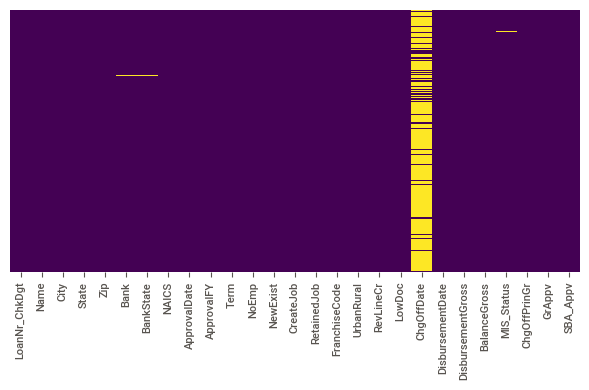

In [291]:
mf.check_cols_with_nulls(sba)

In [292]:
print(f'{mf.color.bdunl}Features with NA values{mf.color.end}')
sba.isna().sum()

Features with NA values


LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

**The number of Na's in rows for the following features, with respect to the size of the database, are not many and can be dropped.**

In [293]:
sba.dropna(subset=['DisbursementDate', 'NewExist', 'City', 'State',
                        'LowDoc', 'Name', 'NAICS', 'CreateJob', 'RetainedJob', 'FranchiseCode',
                        'UrbanRural', 'NoEmp', 'Term', 'MIS_Status'], how='any', inplace=True)      

In [294]:
sba.isna().sum()

LoanNr_ChkDgt             0
Name                      0
City                      0
State                     0
Zip                       0
Bank                   1502
BankState              1509
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4518
LowDoc                    0
ChgOffDate           731189
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>RevLineCr</b></div>

In [295]:
len(sba[(sba['RevLineCr'] != 'Y') & (sba['RevLineCr'] != 'N')])
# too many unknowns, we will drop 'RevlineCr' later

277071

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>LowDoc</b></div>

In [296]:
len(sba[(sba['LowDoc'] != 'Y') & (sba['LowDoc'] != 'N')])

3411

<AxesSubplot:xlabel='LowDoc', ylabel='count'>

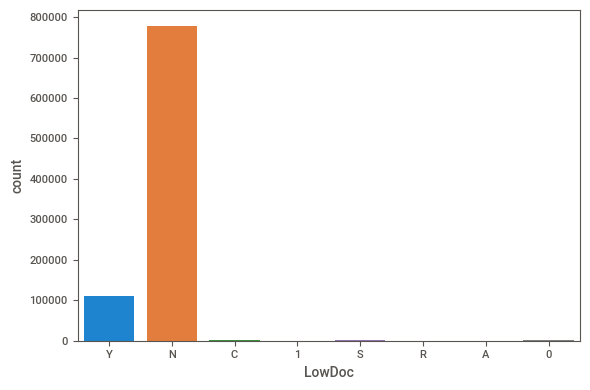

In [297]:
sns.countplot(x='LowDoc',data=sba)

* **LowDoc seems to have a bearing**

In [298]:
# we can drop rows that are not 'Y' or 'N'
sba = sba[(sba['LowDoc'] == 'Y') | (sba['LowDoc'] == 'N')]
len(sba[(sba['LowDoc'] != 'Y') & (sba['LowDoc'] != 'N')])

0

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>NewExist</b>

In [299]:
len(sba[(sba['NewExist'] != 1) & (sba['NewExist'] != 2)])

1021

<AxesSubplot:xlabel='NewExist', ylabel='count'>

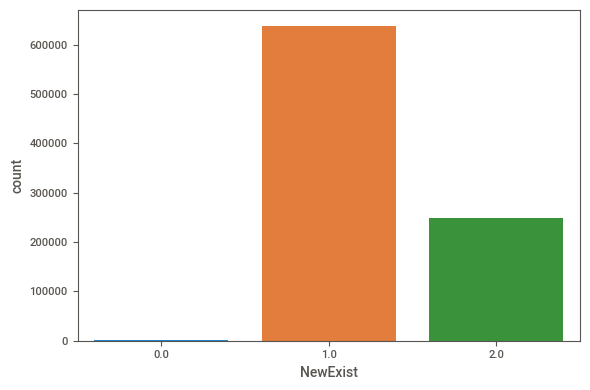

In [300]:
sns.countplot(x='NewExist',data=sba)

In [301]:
# records that are not 1 or 2, we can drop these rows as NewExist seems to have a bearing
sba = sba[(sba['NewExist'] == 1) | (sba['NewExist'] == 2)]
len(sba[(sba['NewExist'] != 1) & (sba['NewExist'] != 2)])

0

In [302]:
sba = sba.astype({'NewExist':np.int8})

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>FranchiseCode</b></div>

In [303]:
sba['FranchiseCode'].unique()

array([    1,     0, 15100, ...,  2899, 18701, 15930], dtype=int64)

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>UrbanRural</b></div>

In [304]:
sba['UrbanRural'].unique()

array([0, 1, 2], dtype=int64)

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Term</b></div>

In [305]:
print(len(sba[sba['Term'].isna()]))
print(len(sba[sba['Term']==0]))
print(len(sba[sba['Term']<0]))

0
801
0


In [306]:
sba.head(2)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,1999-02-28,60000.0,$0.00,P I F,0.0,60000.0,48000.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,1997-05-31,40000.0,$0.00,P I F,0.0,40000.0,32000.0


In [307]:
# Trim leading and trailing spaces
sba['City'] = sba['City'].str.strip()

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Check for na's in all columns</b></div>

['Bank', 'BankState', 'RevLineCr', 'ChgOffDate']


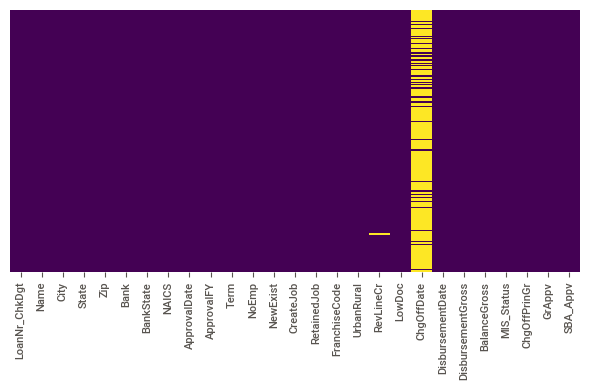

In [308]:
mf.check_cols_with_nulls(sba)

# We can ignore these, features to be dropped later

In [309]:
len(sba)

887826

In [310]:
# Save 2
def Save2():
    # for feather format, reset_index(drop=True) to prevent "Unnamed column" being created
    sdf = sba.copy().reset_index(drop=True)
    sdf.to_feather(f'{workdir}sba_save2.csv.feather')

    # index=False to prevent "Unnamed Column" being created
    #sba.to_csv(f'{workdir}sba_save2.csv', index=False)
    
    print(f'Saved to {workdir}sba_save2.csv.feather')

Save2()

# Short circuiting
(kaggle_flag == 1) and FileLink(r'sba_save2.csv.feather');  # Kaggle only

Saved to C:\Python\Python_Data_Science_Exercises\datasets\sba_save2.csv.feather


<i><a style="color:DarkSlateGrey" href="#toc">Back to Table Of Contents</a></i>

<a id="drop_duplicates"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>2.3 Drop Duplicate Rows</h2>
    </div>

In [311]:
def DropDuplicates():
    dupl_series = sba.duplicated()
    num_of_dupl = len(sba[dupl_series == True])
    if num_of_dupl > 0:
        print(f'Number of Duplicates : {mf.color.bold}{num_of_dupl}{mf.color.end}')
        print()
        print(sba[dupl_series].head(5))
        sba.drop_duplicates(inplace=True)
        print()
        print(f'{mf.color.bold}{num_of_dupl}{mf.color.end} duplicate rows were dropped.')
    else:
        print(f'Duplicate rows found: {mf.color.bold}None{mf.color.end}')

DropDuplicates()

Duplicate rows found: None


<a id="create_new_features"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>2.4 Create New Features</h2>
    </div>

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Industry</b> - The industry sector is the 1st 2 digits of NAICS
    </div>

In [312]:
sba['Industry'] = sba['NAICS'].str[0:2]
sba = sba.astype({'Industry':np.int32})

In [313]:
sba['Industry'].head(2)

0    45
1    72
Name: Industry, dtype: int32

In [314]:
sba['Industry'].unique()
# There is an invalid industry shown which is '0', caused by blank NAICS

array([45, 72, 62,  0, 33, 81, 23, 44, 42, 61, 53, 54, 31, 51, 71, 52, 21,
       32, 56, 48, 11, 92, 22, 49, 55])

In [315]:
len(sba[sba['Industry'] == 0])
# This is a bummer, as industry sector has a big effect on a business, speaking as a business 
# domain expert.  Do we drop those with NAICS = 0 ?

200089

In [316]:
# At this stage, we leave it as is and treat it as unknown industry
sba.head(2)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,Y,NaN,1999-02-28,60000.0,$0.00,P I F,0.0,60000.0,48000.0,45
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,Y,NaN,1997-05-31,40000.0,$0.00,P I F,0.0,40000.0,32000.0,72


In [317]:
# Check if we can impute from the name.  For example, a bar (or similar) business
sba[(sba['Name'].str.contains('bar',case=False)) & (sba['Industry'] == 0)]\
    [['Name','Industry']].head(10)

,Name,Industry
692,DICKEY'S BARBECUE PIT,0
892,MID-STATE REBAR FABRICATORS,0
2763,"MCDUFFY'S SPORTS BAR, INC.",0
3488,PETRUCCI'S DAIRY BARN OF MARLT,0
3941,SEOUL BARBECUE RESTAURANT,0
4022,STEAMERS RAW BAR & SEA GRILLE,0
4748,QUALITY INN BARSTOW,0
7856,THE ISLANDS RAW BAR & GRILL,0
7895,SANTA BARBARA PERIPHERALS INC.,0
8047,M'S PLACE SMOKEHOUSE BARBEQUE,0


**It's not feasible to impute missing Industry codes efficiently, so we abandon the idea.**

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Recession</b><br>
We want to account for variation due to the Great Recession (December 2007 to June 2009). Should we separate the datasets into different time periods ? Before, During, and After ?  Let's check how large the sets are later.  In the meantime, we create a new feature, Recession, with 1 for 'Y' and 0 for 'N' depending on the DisbursementDate. 
<br><br>
</div>

In [318]:
# Convert "DisbursementDate" to datetime

# sba['DisbursementDate'] = pd.to_datetime(sba['DisbursementDate'], format='%d-%b-%y')

# sba.head(2)

In [319]:
# Create new column based on condition
sba['Recession'] = np.where((sba['DisbursementDate'] >= '2007-09-01')\
                     & (sba['DisbursementDate'] <= '2009-06-30'), 1, 0)

In [320]:
print(f'Total - {len(sba)}')
y = len(sba[sba['Recession'] == 1])
n = len(sba[sba['Recession'] == 0])
print(f'Recession - {y}')
print(f'Not Recession - {n}')

Total - 887826
Recession - 65647
Not Recession - 822179


<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Real Estate</b><br>
Loans backed by real estate will have terms 20 years or greater (≥240 months) and are the only loans granted for such a long term, whereas loans not backed by real estate will have terms less than 20 years ( < 240 months).<br><br>
1 - Backed By Real Estate<br>
0 - Not Backed By Real Estate<br><br>

In [321]:
# Create new column based on condition
sba['RealEstate'] = np.where(sba['Term'] >= 240, 1, 0)

In [322]:
print(f'Total - {len(sba)}')
y = len(sba[sba['RealEstate'] == 1])
n = len(sba[sba['RealEstate'] == 0])
print(f'Yes - {y}')
print(f'No - {n}')
print(f'Yes and No - {y+n}')

Total - 887826
Yes - 150700
No - 737126
Yes and No - 887826


<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>SBA_Portion</b><br>
The portion which is the percentage of the loan that is guaranteed by SBA. This is derived by calculating the ratio of the amount of the loan SBA guarantees and the gross amount approved by the bank (SBA_Appv/GrAppv) * 100.<br><br></div>

In [323]:
sba['SBA_Portion']=(sba['SBA_Appv']/sba['GrAppv']) * 100
sba.head(2)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry,Recession,RealEstate,SBA_Portion
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,60000.0,$0.00,P I F,0.0,60000.0,48000.0,45,0,0,80.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,40000.0,$0.00,P I F,0.0,40000.0,32000.0,72,0,0,80.0


**CityState**

In [324]:
sba["CityState"] = sba["City"] + "_" + sba["State"]
sba[["CityState", "City", "State"]].head()

,CityState,City,State
0,EVANSVILLE_IN,EVANSVILLE,IN
1,NEW PARIS_IN,NEW PARIS,IN
2,BLOOMINGTON_IN,BLOOMINGTON,IN
3,BROKEN ARROW_OK,BROKEN ARROW,OK
4,ORLANDO_FL,ORLANDO,FL


In [325]:
sba.head(2)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry,Recession,RealEstate,SBA_Portion,CityState
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,$0.00,P I F,0.0,60000.0,48000.0,45,0,0,80.0,EVANSVILLE_IN
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,$0.00,P I F,0.0,40000.0,32000.0,72,0,0,80.0,NEW PARIS_IN


In [326]:
# Save 3
def Save3():
    sdf = sba.copy().reset_index(drop=True)
    sdf.to_feather(f'{workdir}sba_save3.csv.feather')

    print(f'Saved to {workdir}sba_save3.csv.feather')
    
Save3()

(kaggle_flag == 1) and FileLink(r'sba_save3.csv.feather');  # Kaggle only

Saved to C:\Python\Python_Data_Science_Exercises\datasets\sba_save3.csv.feather


<i><a style="color:DarkSlateGrey" href="#toc">Back to Table Of Contents</a></i>

<a id="encode_cat"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>2.5 Encode Categorical Features</h2>
    </div>

In [327]:
sba.select_dtypes(["object"]).nunique()

Name            771232
City             32346
State               51
Bank              5791
BankState           56
NAICS             1311
ApprovalDate      9815
ApprovalFY          47
RevLineCr           18
LowDoc               2
ChgOffDate        6429
BalanceGross        15
MIS_Status           2
CityState        44196
dtype: int64

<div style="font-family: Trebuchet MS;background-color:Chocolate;color:AliceBlue;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>MIS_Status</b><br>
    This will be the <b>target</b> variable</div>

P I F     732244
CHGOFF    155582
Name: MIS_Status, dtype: int64


<AxesSubplot:xlabel='MIS_Status', ylabel='count'>

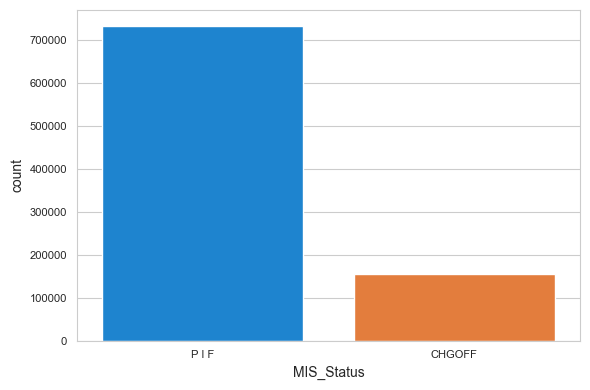

In [328]:
sns.set_style('whitegrid')
# Target variable is MIS Status, a categorical variable

print(sba['MIS_Status'].value_counts())
sns.countplot(x='MIS_Status',data=sba)

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    This shows a skewed distribution, where this bias in the target can influence many machine learning algorithms, leading some to ignore the minority class entirely, in this case, CHGOFF.  Before oversampling the data, will try as is.<br><br></div>

In [329]:
# Update column based on condition
sba['MIS_Status'] = np.where((sba['MIS_Status'] == 'P I F'), 1, 0)

In [330]:
print(sba['MIS_Status'].dtype)
sba.head(2)[['City','MIS_Status']]

int32


,City,MIS_Status
0,EVANSVILLE,1
1,NEW PARIS,1


<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>LowDoc</b><br>
'Y' = 1<br>
'N' = 0

In [331]:
# Update column based on condition
sba['LowDoc'] = np.where((sba['LowDoc'] == 'Y'), 1, 0)

sba.head(2)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry,Recession,RealEstate,SBA_Portion,CityState
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,$0.00,1,0.0,60000.0,48000.0,45,0,0,80.0,EVANSVILLE_IN
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,$0.00,1,0.0,40000.0,32000.0,72,0,0,80.0,NEW PARIS_IN


<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Others</b></div>

In [332]:
# will not hash 'City' as it is already covered by 'CityState'

def HashCol():
    cols_to_drop = []
    hash_constant = 900000   # fixed value so we can programmatically reproduce the hash when needed
    len_data=len(sba)
    for col in sba[['State','CityState']]:
        if sba[col].dtype == 'object':
            print(f'Column {col} has {sba[col].nunique()} values among {len_data}')

        if sba[col].nunique() < 25:
            print(f'One-hot encoding of {col}')
            one_hot_cols = pd.get_dummies(sba[col])
            for ohc in one_hot_cols.columns:
                sba[col + '_' + ohc] = one_hot_cols[ohc]
        else:
            print(f'Hashing of {col}')
            sba[col + '_hash'] = sba[col].apply(lambda row: int(hashlib.sha1((col + "_" + \
                                    str(row)).encode('utf-8')).hexdigest(), 16) % hash_constant)

        cols_to_drop.append(col)
    print(cols_to_drop)

HashCol()

Column State has 51 values among 887826
Hashing of State
Column CityState has 44196 values among 887826
Hashing of CityState
['State', 'CityState']


In [333]:
sba.head(2)[['State','CityState','State_hash','CityState_hash']]

,State,CityState,State_hash,CityState_hash
0,IN,EVANSVILLE_IN,705173,717067
1,IN,NEW PARIS_IN,705173,639604


In [334]:
sba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887826 entries, 0 to 899163
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      887826 non-null  int64         
 1   Name               887826 non-null  object        
 2   City               887826 non-null  object        
 3   State              887826 non-null  object        
 4   Zip                887826 non-null  int64         
 5   Bank               886328 non-null  object        
 6   BankState          886321 non-null  object        
 7   NAICS              887826 non-null  object        
 8   ApprovalDate       887826 non-null  object        
 9   ApprovalFY         887826 non-null  object        
 10  Term               887826 non-null  int64         
 11  NoEmp              887826 non-null  int64         
 12  NewExist           887826 non-null  int8          
 13  CreateJob          887826 non-null  int64   

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>TimeFrame</b><br>
Create a dataset for later use where we restrict the time frame to loans by excluding those disbursed after 2010 due to the fact the term of a loan is frequently 5 or more years.
    <br><br>

In [335]:
sba_bef_2011 = sba[sba['DisbursementDate'] <= '2010-12-31'].copy()
len(sba_bef_2011[sba_bef_2011['DisbursementDate'] > '2010-12-31'])
len(sba_bef_2011[sba_bef_2011['DisbursementDate'] <= '2011-01-01'])

868663

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Drop columns that are no longer needed<b></div>

In [336]:
cols_to_drop = ['LoanNr_ChkDgt', 'Bank', 'BankState', 'ApprovalDate',
                        'ApprovalFY', 'ChgOffDate', 'BalanceGross', 'NAICS', 'ChgOffPrinGr',
                        'Name', 'RevLineCr', 'DisbursementDate', 'City', 'State', 'CityState',
                         'GrAppv','Zip']

sba_bef_2011.drop(columns=cols_to_drop, inplace=True)

sba_bef_2011 = mf.reduce_mem_usage(sba_bef_2011)

print()
print('Unneeded Columns Dropped')
print(sba_bef_2011.info())

Memory usage of dataframe is 96.93 MB

Memory usage after optimization is: 38.94 MB
Decreased by 59.8%

Unneeded Columns Dropped
<class 'pandas.core.frame.DataFrame'>
Int64Index: 868663 entries, 0 to 899163
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Term               868663 non-null  int16  
 1   NoEmp              868663 non-null  int16  
 2   NewExist           868663 non-null  uint8  
 3   CreateJob          868663 non-null  int16  
 4   RetainedJob        868663 non-null  int16  
 5   FranchiseCode      868663 non-null  int32  
 6   UrbanRural         868663 non-null  uint8  
 7   LowDoc             868663 non-null  uint8  
 8   DisbursementGross  868663 non-null  float32
 9   MIS_Status         868663 non-null  uint8  
 10  SBA_Appv           868663 non-null  float32
 11  Industry           868663 non-null  uint8  
 12  Recession          868663 non-null  uint8  
 13  RealEstate         8

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Check for Infinite Values<b></div>

In [337]:
mf.check_infinity_nan(sba_bef_2011,'sba_bef_2011')

checking for infinity

printing the count of infinity values
sba_bef_2011 contains 0 infinite values

Does sba_bef_2011 have Nan or Null values ?  False


<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Check Correlations</b></div>

[Text(0, 0.5, 'Term'),
 Text(0, 1.5, 'NoEmp'),
 Text(0, 2.5, 'NewExist'),
 Text(0, 3.5, 'CreateJob'),
 Text(0, 4.5, 'RetainedJob'),
 Text(0, 5.5, 'FranchiseCode'),
 Text(0, 6.5, 'UrbanRural'),
 Text(0, 7.5, 'LowDoc'),
 Text(0, 8.5, 'DisbursementGross'),
 Text(0, 9.5, 'MIS_Status'),
 Text(0, 10.5, 'SBA_Appv'),
 Text(0, 11.5, 'Industry'),
 Text(0, 12.5, 'Recession'),
 Text(0, 13.5, 'RealEstate'),
 Text(0, 14.5, 'SBA_Portion'),
 Text(0, 15.5, 'State_hash'),
 Text(0, 16.5, 'CityState_hash')]

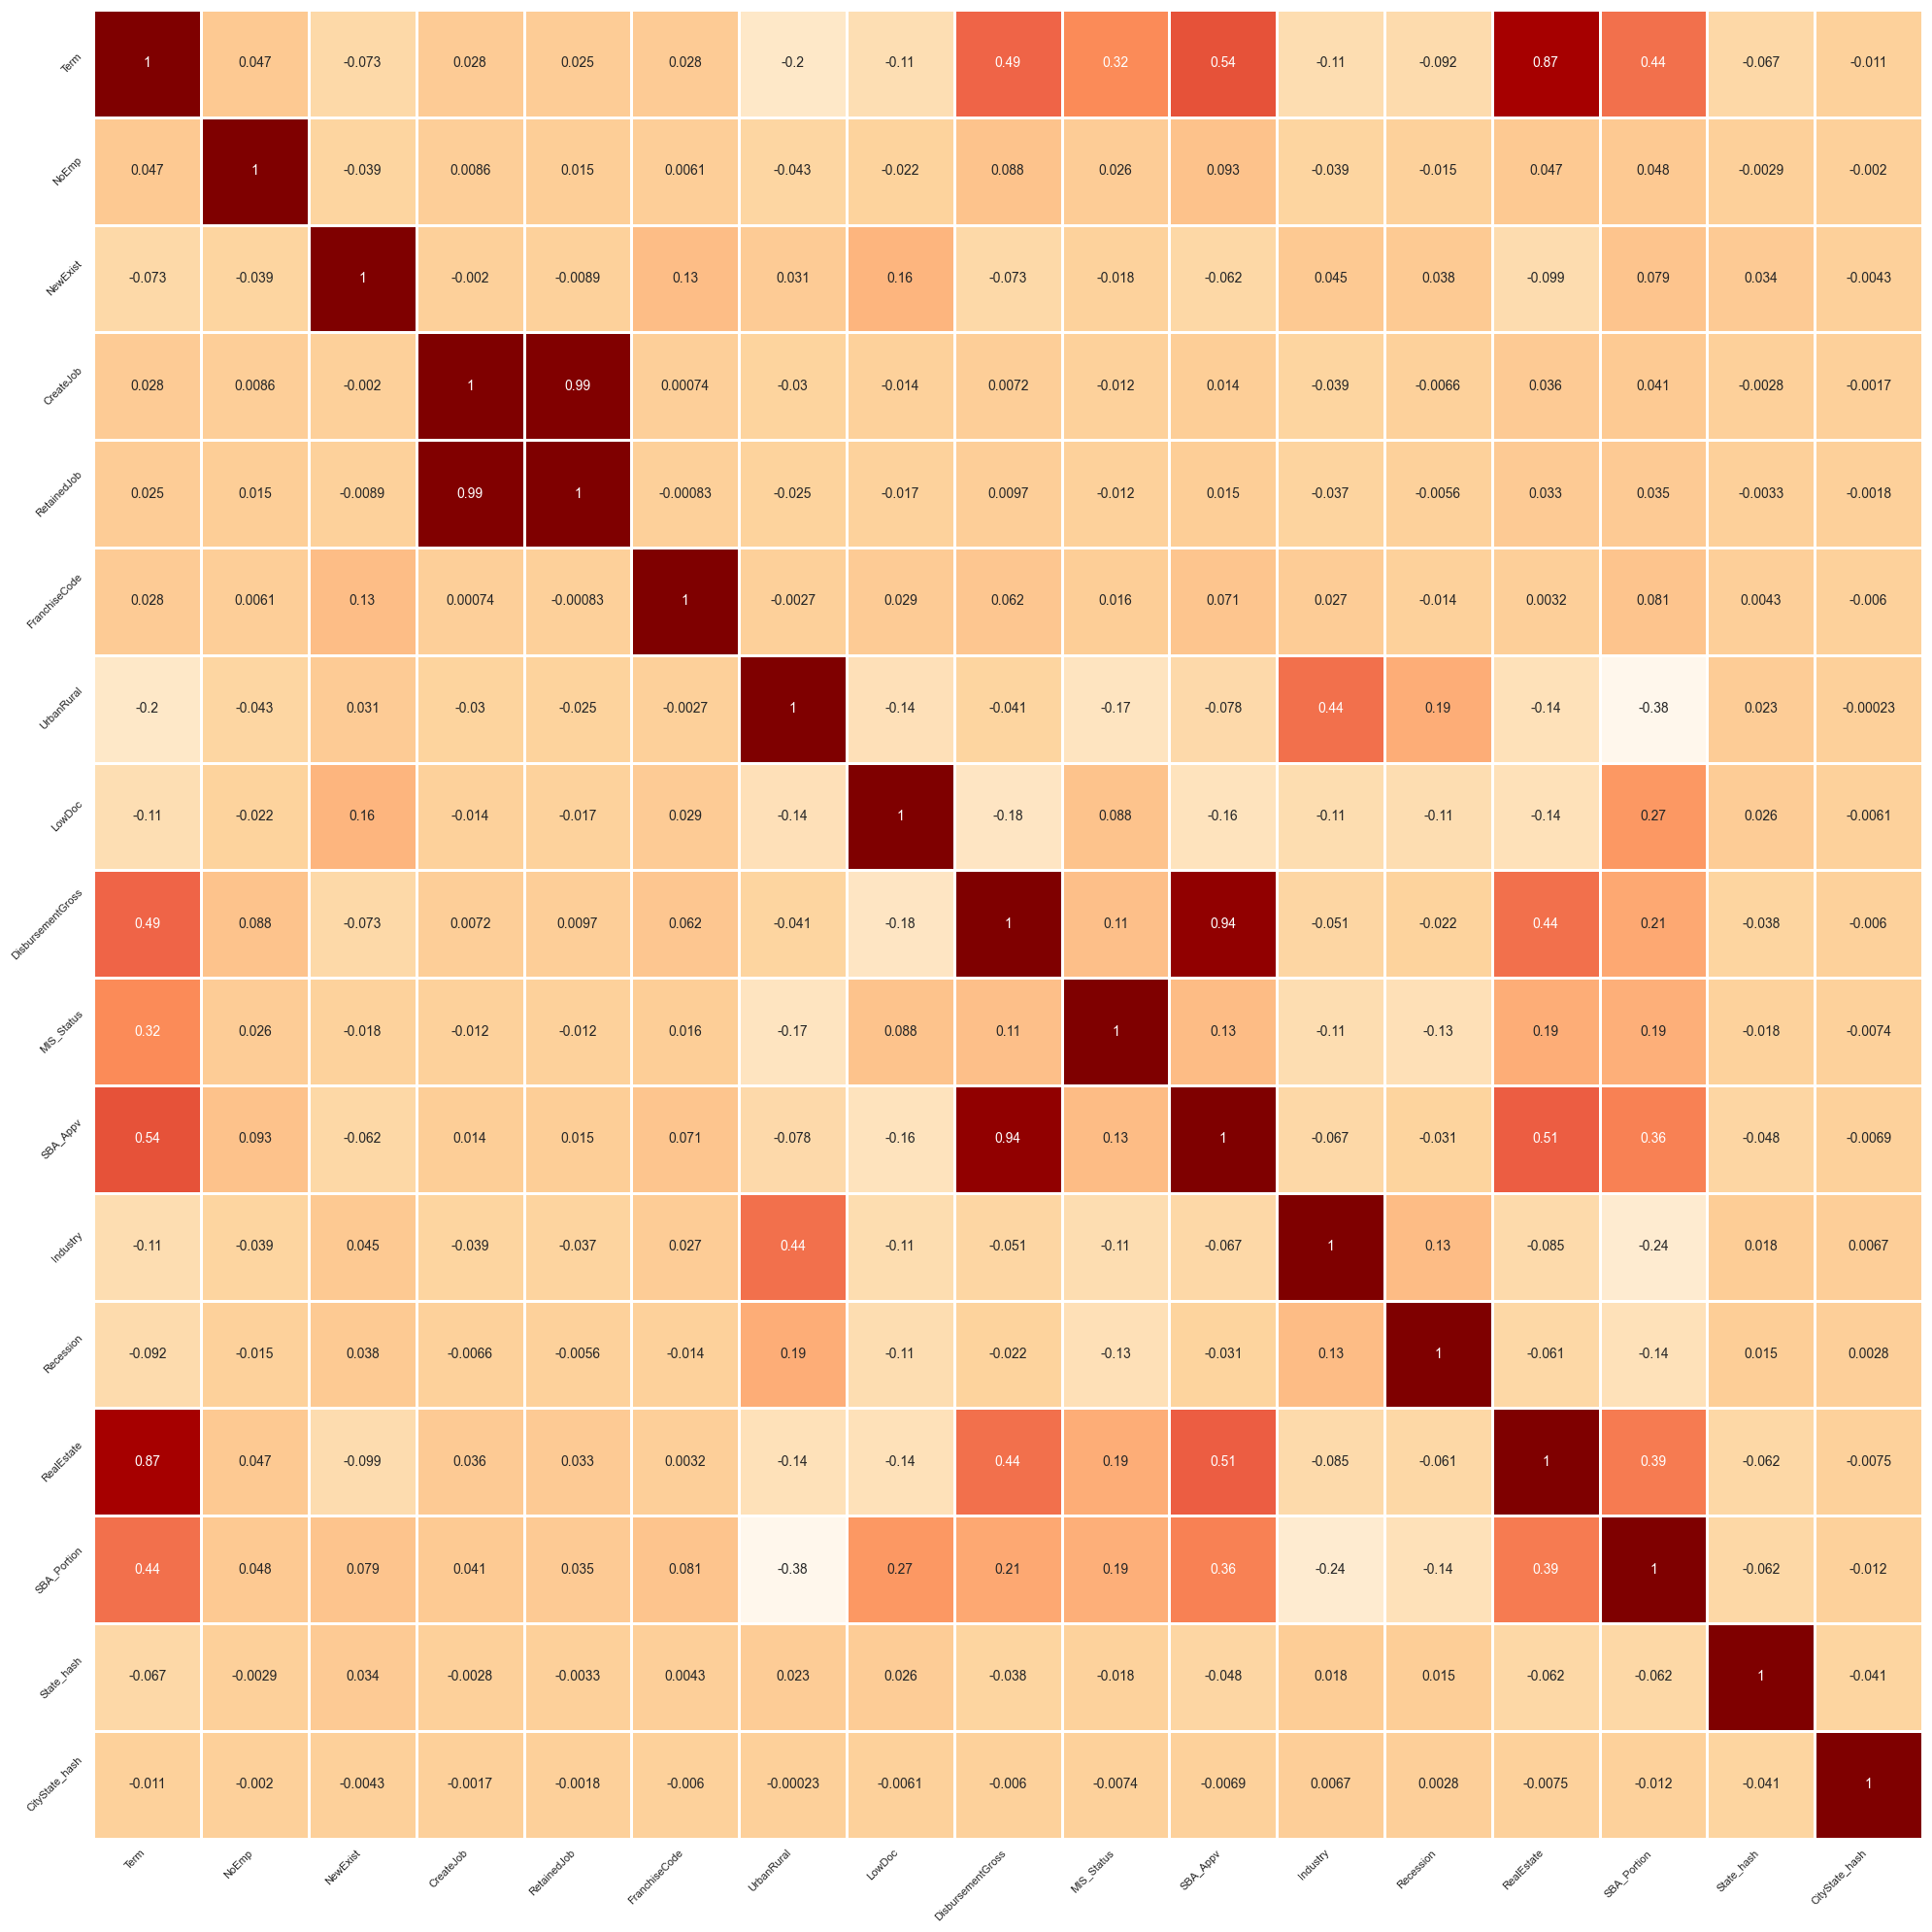

In [338]:
fig, ax = plt.subplots(figsize=(20,20))

g = sns.heatmap(
    sba_bef_2011.corr(),
    annot=True,
    ax=ax,
    cmap='OrRd',
    cbar=False,
    linewidth=1
)

g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), rotation=45, horizontalalignment='right')

<a id="eda_check"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>2.6 EDA Check</h2><br>
    Here we generate a SweetViz report for another EDA review
    </div>

In [339]:
htmlpath = f'{workdir}SBA_sweetviz_report_after.html'
mf.GetSweetVizReport(sba_bef_2011,htmlpath,kaggle_flag)

print()
(kaggle_flag == 1) and mf.create_download_link('Open SweetViz Report in browser ---> ',\
                                            f'{htmlpath}');

SweetViz Report has been downloaded to kaggle working directory C:\Python\Python_Data_Science_Exercises\datasets\SBA_sweetviz_report_after.html



<div style="font-family: Trebuchet MS;background-color:PowderBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Save Final Dataset<b></div>

In [340]:
'''
FINAL Dataset: We will save sba_bef_2011 as our final dataset
'''
def SaveFinalDF():
    # Save sba_bef_2011
    sdf = sba_bef_2011.copy().reset_index(drop=True)
    sdf.to_feather(f'{workdir}sba_bef_2011.csv.feather')
    print(f"saved to {workdir}sba_bef_2011.csv.feather")
    
    #sdf = pd.read_csv(f'{workdir}sba_bef_2011.csv')
    #sdf.to_csv(f'{workdir}sba_final.csv', index=False)
    
    # copy to feather
    src_file=f'{workdir}sba_bef_2011.csv.feather'
    dst_file=f'{workdir}sba_final.csv.feather'
    shutil.copy2(src_file, dst_file)
    
    #save to a csv copy as well
    sdf.to_csv(f'{workdir}sba_final.csv', index=False)

    print(f'Final Dataset saved as {workdir}sba_final.csv.feather and {workdir}sba_final.csv')

SaveFinalDF()
(kaggle_flag == 1) and FileLink(r'sba_final.csv.feather');  # Kaggle only

saved to C:\Python\Python_Data_Science_Exercises\datasets\sba_bef_2011.csv.feather
Final Dataset saved as C:\Python\Python_Data_Science_Exercises\datasets\sba_final.csv.feather and C:\Python\Python_Data_Science_Exercises\datasets\sba_final.csv


In [341]:
del sba_bef_2011
gc.collect()
sleep(3)

<i><a style="color:DarkSlateGrey" href="#toc">Back to Table Of Contents</a></i>

<a id="build_model"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>3. Build Model Using XGBoost</h2>
    </div>

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Early Stopping Rounds<b></div>

"<b>Overfitting</b> is a problem with sophisticated non-linear learning algorithms like gradient boosting.  Early stopping is an approach to training complex machine learning models to avoid overfitting.
<br><br>
<b>XGBoost supports early stopping after a fixed number of iterations.</b>  In addition to specifying a metric and test dataset for evaluation in each epoch, one must specify a window of the number of epochs over which no improvement is observed. This is specified in the early_stopping_rounds parameter.
<br><br>
It is generally a good idea to select the early_stopping_rounds as a reasonable function of the total number of training epochs (10% in this case) or attempt to correspond to the period of inflection points as might be observed on plots of learning curves.
<br><br> - <a href = "https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/">Avoid Overfitting By Early Stopping With XGBoost In Python</a>

<a id="model1"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>3.1 Model v1</h2>
    </div>

MIS_Status Count ->  1 : 714212, 0 : 154451

Please wait, Fitting model can take time ...
Fitting model completed.

Preparing Predictions

Metrics : Full SBA Not Oversampled

y_valid RMSE: 0.23765056991918115

y_valid f1 score: 94.35222066170884

------------------------------

Confusion Matrix using Validation Data (y_valid)

True Negative : CHGOFF (0) was predicted 18825 times correctly     (86.19 %)
False Negative : CHGOFF (0) was predicted 3017 times incorrectly     (13.81 %)
True Positive : P I F (1) was predicted 104115 times correctly     (96.0 %)
False Positive : P I F (1) was predicted 4342 times incorrectly     (4.0 %)
CPU times: total: 8min 17s
Wall time: 1min 10s


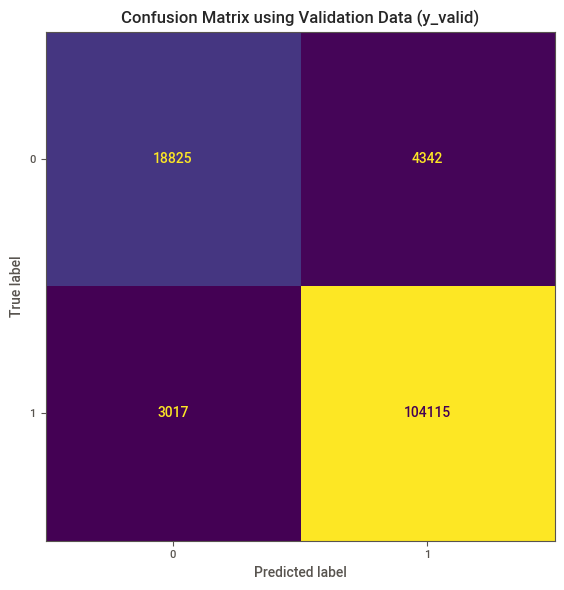

In [342]:
%%time

def RunModelv1():
    # Select subset of predictors
    X = pd.read_feather(f'{workdir}sba_final.csv.feather')
    y = X.pop('MIS_Status')

    model1 = process_model(X, y)   # Initiate class
    model1.split_data(0.7)         # Split data into train (70%), valid (15%), and test (15%)
    
    params = {'n_estimators': 1000, 'learning_rate': 0.05, 'max_depth': 6,
                               'tree_method':tree_method, 'early_stopping_rounds':100,
                               'eval_metric':['auc','error']}
    model1_results = model1.prep_run_model( "Metrics : Full SBA Not Oversampled",hyperparams=params)
    return modelv1_results
    
model1_results = RunModelv1()

<div class="alert alert-block alert-info">  
    Due to the imbalanced target data, the <b>Accuracy</b> metric is not suitable as it will favor the majority.  Instead, we use the <b>f1_score</b> metric, a balance of <b>precision</b> and <b>recall</b>.</b><br><br>
The f1_score here is good.  One technique for correcting imbalanced data is resampling.  Is there a benefit to resample our training data to fix the imbalance ?  Yes, as this current model, although with its good score, may be more biased towards the majority.  More of our predictions might end up as positive - i.e. Approve the loan. 
</div>

<i><a style="color:DarkSlateGrey" href="#toc">Back to Table Of Contents</a></i>

<a id="model2"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>3.2 Model v2</h2><br>
    With Undersampling
       </div>

MIS_Status Count ->  1 : 714212, 0 : 154451

X_train size :  608064
X_valid size :  130299
X_test size  :  130300

Please wait, resampling train data

Before Resampling train -> 1 : 499948, 0 : 108116
After Resampling  train -> 1 : 108116, 0 : 108116

Resampling Runtime : 0:00:00.378166

Please wait, Fitting model can take time ...
Fitting model completed.

Preparing Predictions

Metrics : SBA Undersampled

y_valid RMSE: 0.28013096478567506

y_valid f1 score: 92.15266425682469

------------------------------

Confusion Matrix using Validation Data (y_valid)

True Negative : CHGOFF (0) was predicted 21429 times correctly     (71.63 %)
False Negative : CHGOFF (0) was predicted 8487 times incorrectly     (28.37 %)
True Positive : P I F (1) was predicted 98645 times correctly     (98.27 %)
False Positive : P I F (1) was predicted 1738 times incorrectly     (1.73 %)
CPU times: total: 2min 33s
Wall time: 27.1 s


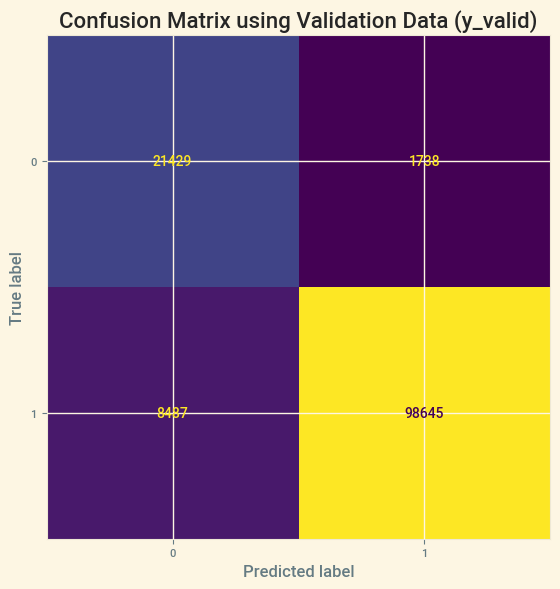

In [363]:
%%time

def RunModelv2():
    X = pd.read_feather(f'{workdir}sba_final.csv.feather')
    y = X.pop('MIS_Status')
    
    model2 = process_model(X, y)
    model2.split_data(0.7)
    model2.osample(os_data=[1,0,0], os_class = 'rus')
    
    model2.X, model2.y = None, None
    del X, y
    gc.collect()
    sleep(3)
    
    model2_results = model2.prep_run_model("Metrics : SBA Undersampled")
    
    # save to files for reuse later
    model2_results['xg_model'].save_model(f'{workdir}modelv2.json')
    joblib.dump(model2_results, f"{workdir}model2_results.dict")      
  
RunModelv2()

<i><a style="color:DarkSlateGrey" href="#toc">Back to Table Of Contents</a></i>

<a id="model3"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>3.3 Model v3</h2><br>
    With Oversampling
       </div>

MIS_Status Count ->  1 : 714212, 0 : 154451

X_train size :  608064
X_valid size :  130299
X_test size  :  130300

Please wait, resampling train data

Before Resampling train -> 1 : 499948, 0 : 108116
After Resampling  train -> 1 : 499948, 0 : 499948

Resampling Runtime : 0:00:00.879380

Please wait, Fitting model can take time ...
Fitting model completed.

Preparing Predictions

Metrics : SBA Oversampled

y_valid RMSE: 0.2744012570207456

y_valid f1 score: 92.47039501454347

------------------------------

Confusion Matrix using Validation Data (y_valid)

True Negative : CHGOFF (0) was predicted 21320 times correctly     (72.8 %)
False Negative : CHGOFF (0) was predicted 7964 times incorrectly     (27.2 %)
True Positive : P I F (1) was predicted 99168 times correctly     (98.17 %)
False Positive : P I F (1) was predicted 1847 times incorrectly     (1.83 %)
CPU times: total: 7min 49s
Wall time: 1min 11s


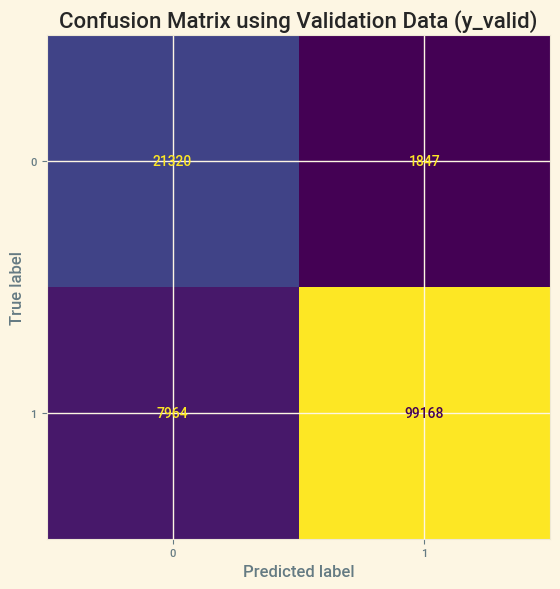

In [364]:
%%time

def RunModelv3():
    X = pd.read_feather(f'{workdir}sba_final.csv.feather')
    y = X.pop('MIS_Status')
    
    model3 = process_model(X, y)
    model3.split_data(0.7)
    model3.osample(os_data=[1,0,0])
    
    model3.X, model3.y = None, None
    del X, y
    gc.collect()
    sleep(3)
    
    model3_results = model3.prep_run_model("Metrics : SBA Oversampled")
    
    # save to files for reuse later
    model3_results['xg_model'].save_model(f'{workdir}modelv3.json')
    joblib.dump(model3_results, f"{workdir}model3_results.dict")      
    
    return model3_results
  
model3_results = RunModelv3()

<div class="alert alert-block alert-info">  
After oversampling, our f1_score is now lower than when not oversampled.  However, at least our model is now <b>not biased towards mostly positive (majority)</b>, and paradoxically, be more accurate than the model using data that is not resampled and has a higher f1_score. <br><br>
This can be confirmed using tests against data that we know are negative.  Without oversampling, more of these will be predicted as postive.
</div>

**Next two cells are just comparing results of two different ways of loading a saved dictionary file.  Result should be the same.** 

Hyperparameter values


{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'eval_metric': ['logloss', 'error'],
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'interaction_constraints': '',
 'learning_rate': 0.05,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'monotone_constraints': '()',
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'hist',
 'validate_parameters': 1,
 'verbosity': None}

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

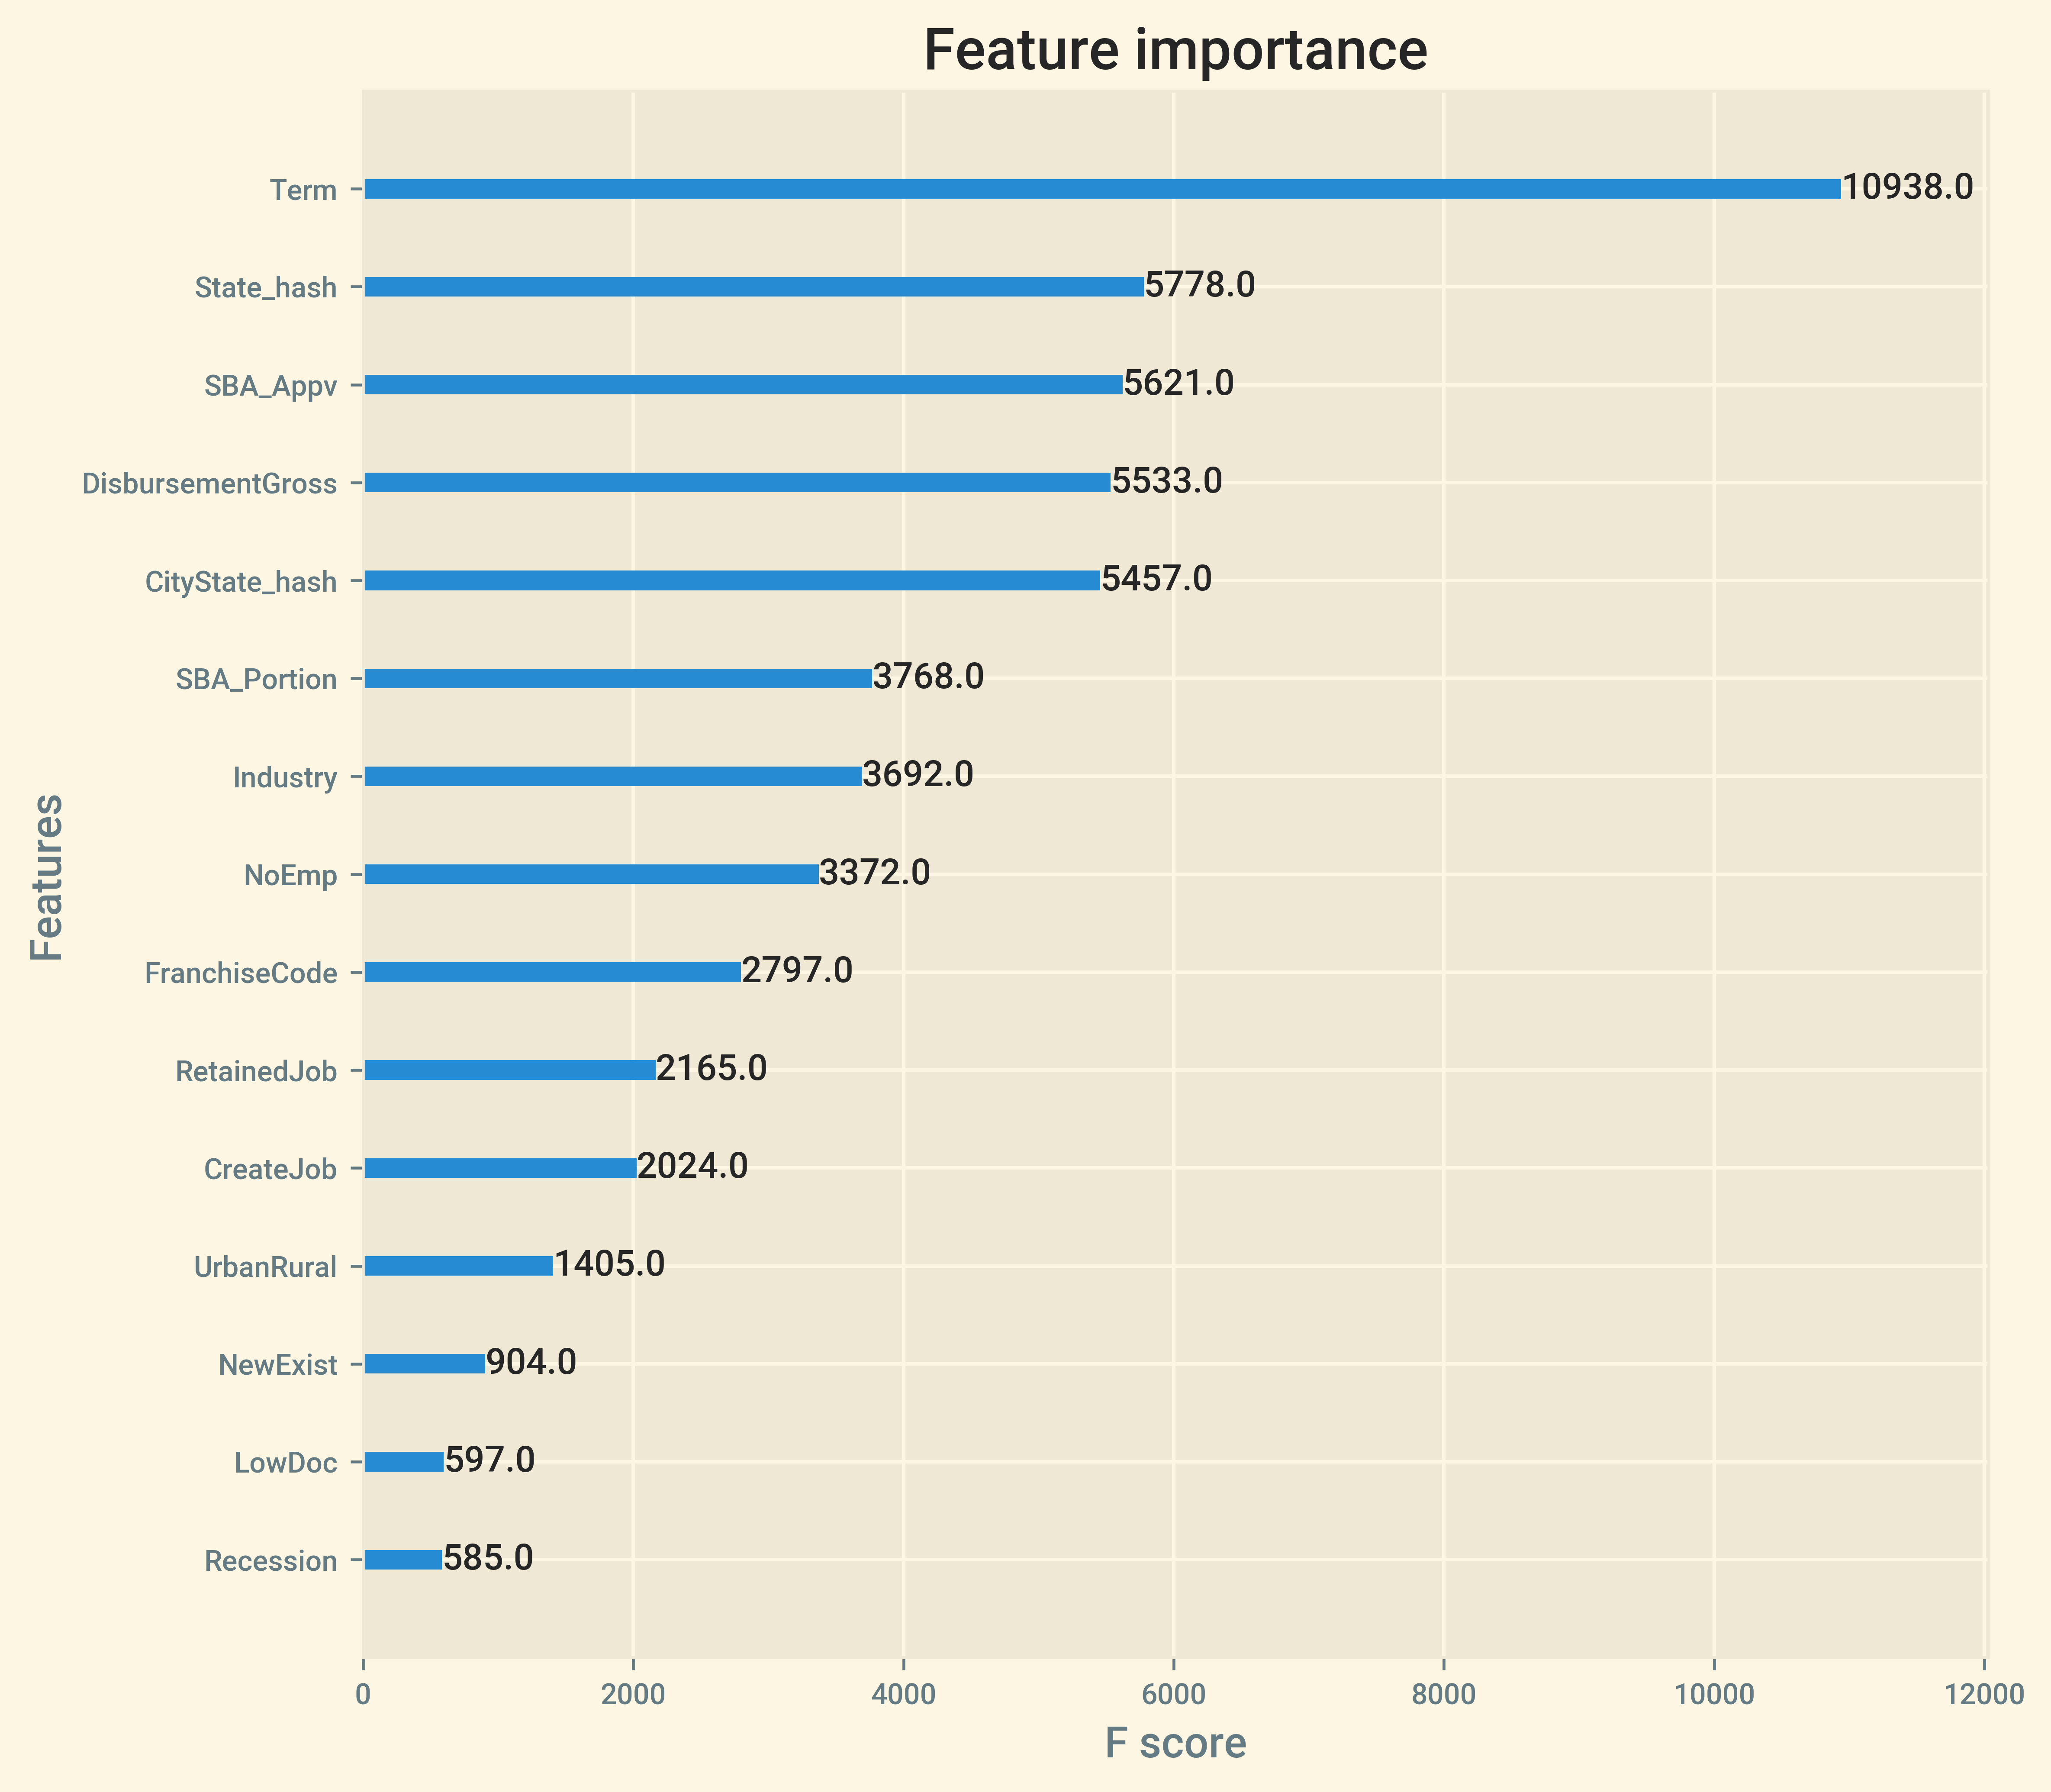

<Figure size 1800x1200 with 0 Axes>

In [349]:
# Plot feature importance
modelv3 = XGBClassifier()
modelv3.load_model(f'{workdir}modelv3.json')
print(f'{mf.color.bdblue}Hyperparameter values{mf.color.end}')
display(modelv3.get_xgb_params())

mf.plot_features(modelv3, (8,7))

<div class="alert alert-block alert-info">
    <b>Observation</b><br>
    I was hoping to see <b>Industry</b> at a much higher position here, but apparently the incomplete data on industry had an effect.<br><br>
Furthermore, <b>Recession</b> has to be at a very high position, but is at the bottom instead.  This could be due to <b>Recession</b> data being highly skewed towards 1 (Not Recession).<br><br>
<b>Real Estate</b> should have good importance too, but it may be highly skewed as well.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

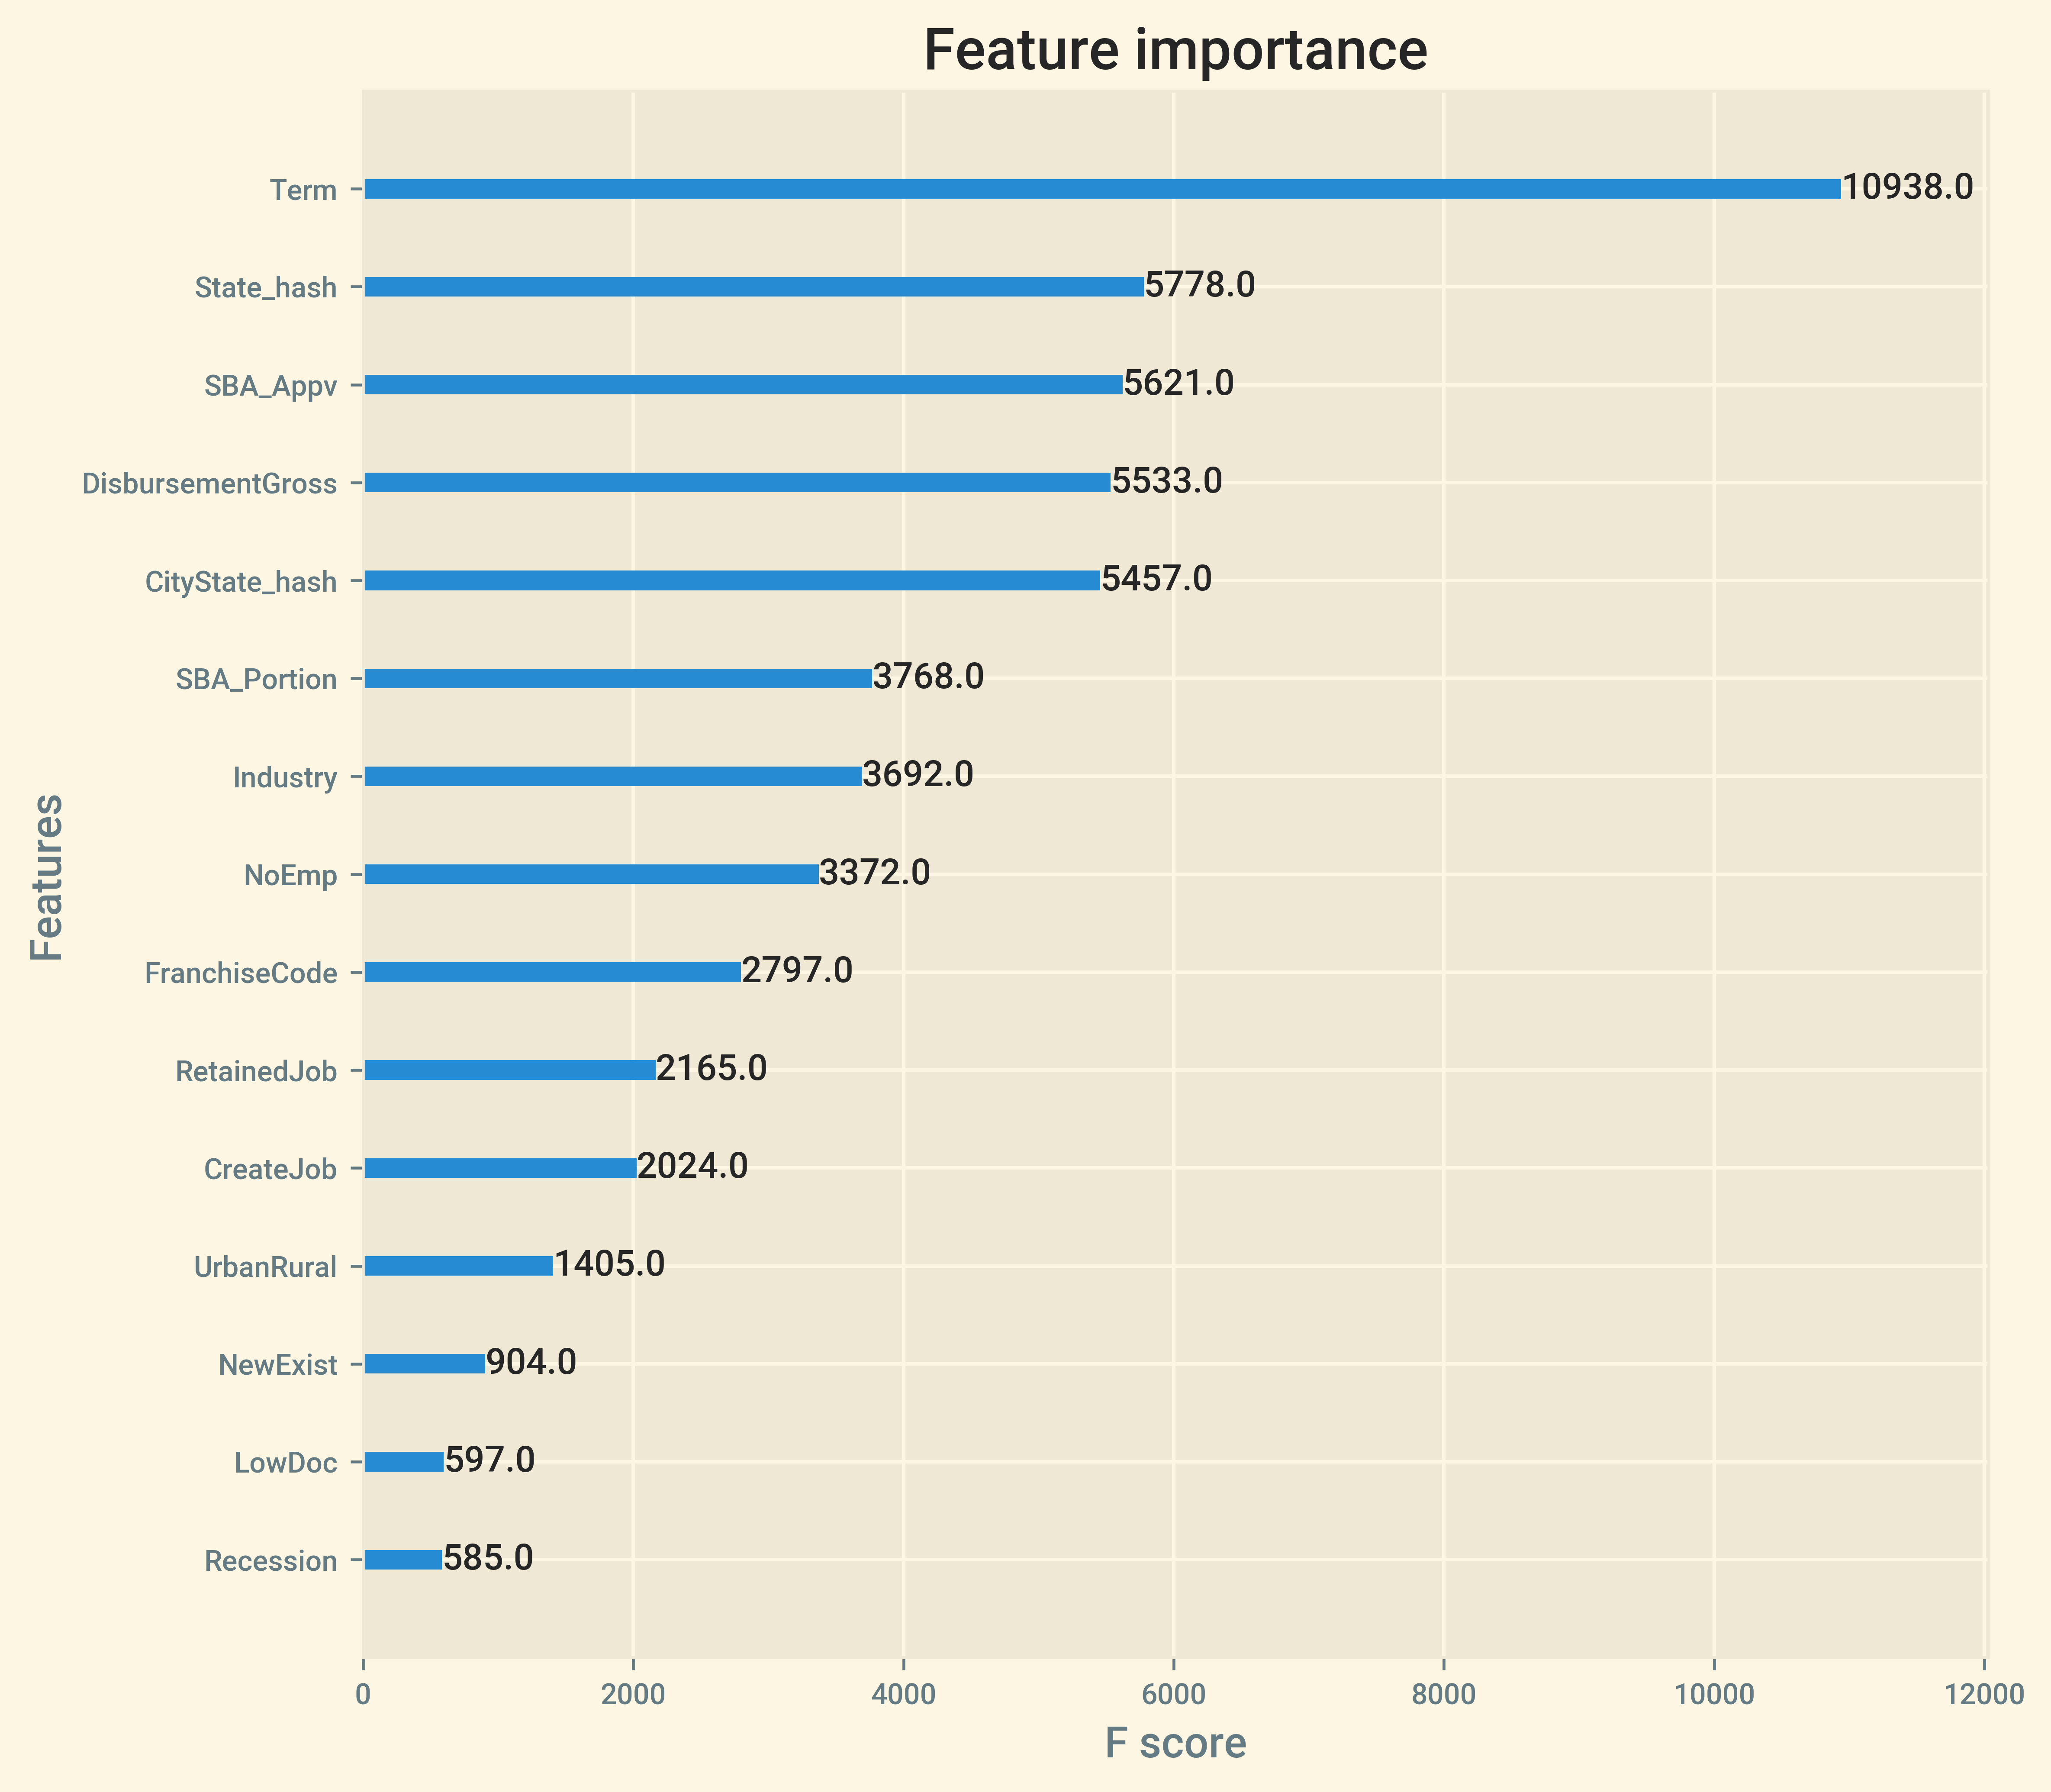

<Figure size 1800x1200 with 0 Axes>

In [345]:
model3_results = joblib.load(f"{workdir}model3_results.dict")

mf.plot_features(model3_results['xg_model'], (8,7))

<i><a style="color:DarkSlateGrey" href="#toc">Back to Table Of Contents</a></i>

<a id="test_model"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>4. Test Model</h2>
    </div>
    

<a id="test_test_dataset"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>4.1 Test Model with Test Dataset</h2>
    Test Dataset was previously unseen by the model.
    </div>


y_test RMSE: 0.2762538568053784

y_test f1 score: 92.36838066001535

------------------------------

Confusion Matrix using Unseen Test Data (y_test)

True Negative : CHGOFF (0) was predicted 21308 times correctly     (72.5 %)
False Negative : CHGOFF (0) was predicted 8084 times incorrectly     (27.5 %)
True Positive : P I F (1) was predicted 99048 times correctly     (98.16 %)
False Positive : P I F (1) was predicted 1860 times incorrectly     (1.84 %)


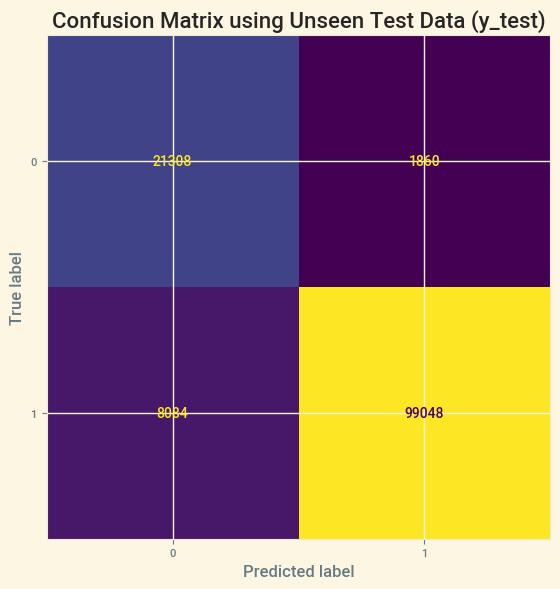

In [365]:
def Modelv3WithTestData():
    X_test = model3_results['X_test']
    y_test = model3_results['y_test']
    
    # Get predictions
    predictions = modelv3.predict(X_test)
    #mf.model_eval(y_test, predictions);
    mf.model_eval2(modelv3,
                   model3_results['X_train'], model3_results['y_train'],
                   X_test, y_test,
                   cmDisplay=True, prtstr = 'y_test')
  
Modelv3WithTestData()

<a id="test_user_input"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>4.2 Test Model with User Input</h2>
    </div>

<div class="alert alert-block alert-info">So let's assume the following are <b>the entries of a user</b>, through a user interface, looking for a prediction from our model.</div>

In [366]:
def UserInputTest():
    # 16 entries
    user_input =   {'Term':50, 
                    'NoEmp':0,
                    'NewExist':1,
                    'CreateJob':0 ,          
                    'RetainedJob':0,         
                    'FranchiseCode':1,       
                    'UrbanRural':0,           
                    'LowDoc':0,               
                    'DisbursementGross':50000,                 
                    'SBA_Appv':25000,          
                    'Industry':71, 
                    'Recession':0,
                    'RealEstate':0,           
                    'SBA_Portion':50,
                    'City':'EVANSVILLE',
                    'State':'IN'
                   }

    city = user_input['City']
    state = user_input['State']
    city_state = f'{city}_{state}'

    state_hash = int(hashlib.sha1(('State' + "_" + \
                              str(state)).encode('utf-8')).hexdigest(), 16) % 900000
    city_state_hash = int(hashlib.sha1(('CityState' + "_" + \
                              str(city_state)).encode('utf-8')).hexdigest(), 16) % 900000

    print(f'State_hash = {state_hash}')
    print(f'CityState_hash = {city_state_hash}')

    user_input.pop('City')
    user_input.pop('State')
    user_input['State_hash'] = state_hash
    user_input['CityState_hash'] = city_state_hash

    user_input_list = list(user_input.values())
    
    return {'user_input':user_input, 'user_input_list':user_input_list}

user_input_param = UserInputTest()

print()
print(f"{mf.color.bold}User Entry:{mf.color.end}")
user_input_param['user_input']

State_hash = 705173
CityState_hash = 717067

User Entry:


{'Term': 50,
 'NoEmp': 0,
 'NewExist': 1,
 'CreateJob': 0,
 'RetainedJob': 0,
 'FranchiseCode': 1,
 'UrbanRural': 0,
 'LowDoc': 0,
 'DisbursementGross': 50000,
 'SBA_Appv': 25000,
 'Industry': 71,
 'Recession': 0,
 'RealEstate': 0,
 'SBA_Portion': 50,
 'State_hash': 705173,
 'CityState_hash': 717067}

In [367]:
# User Input test 1
def UserInputTest1():
    features = np.array([user_input_param['user_input_list']])   

    # using inputs to predict the output
    pred = modelv3.predict(features)
    if pred[0] == 1:
        print(f'{mf.color.bdblue}Prediction: Approve The Loan{mf.color.end}')
    else:
        print(f'{mf.color.bdred}Prediction: Do Not Approve The Loan{mf.color.end}')
        
UserInputTest1()
print(f'Correct answer is: {mf.color.bold}Do Not Approve{mf.color.end}')

Prediction: Do Not Approve The Loan
Correct answer is: Do Not Approve


In [368]:
# User Input test 2
def UserInputTest2():
    '''
    # if one wants to edit the list from the previous cell
    user_input2_list = user_input_list[:]   # make a copy
    user_input2_list[0] = 500          # change term 
    '''

    user_input2 = copy.deepcopy(user_input_param['user_input'])
    user_input2['Term'] = 500     # change term
    user_input2_list = list(user_input2.values())

    features = np.array([user_input2_list]) 

    # using inputs to predict the output
    pred = modelv3.predict(features)
    if pred[0] == 1:
        print(f'{mf.color.bdblue}Prediction: Approve The Loan{mf.color.end}')
    else:
        print(f'{mf.color.bdred}Prediction: Do Not Approve The Loan{mf.color.end}')
        
UserInputTest2()
print(f'Correct answer is: {mf.color.bold}Approve{mf.color.end}')

Prediction: Approve The Loan
Correct answer is: Approve


<div style="font-family: Trebuchet MS;background-color:HoneyDew;color:Black;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;border: 5px solid CadetBlue;"><b>Predictions:</b><br>
    
- 1 -> can approve<br>
- 0 -> do not approve<br>

Of course, in real life, will need to check further using other data (e.g. financial statements, kind of real estate, etc.) or other data's models if available.

In [ ]:
del user_input_param
gc.collect()

<a id="test_user_input"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>4.3 Test Model with Full Dataset</h2>
    </div>

In [369]:
def Modelv3TestFull():
    X = pd.read_feather(f'{workdir}sba_final.csv.feather')
    y = X.pop('MIS_Status')
    
    fd = process_model(X, y)
    fd.osample_Xy()
    
    modelv3 = XGBClassifier()
    modelv3.load_model(f'{workdir}modelv3.json')
    
    # Get predictions
    predictions = modelv3.predict(fd.X)
    mf.model_eval(fd.y, predictions) 
  
Modelv3TestFull()

MIS_Status Count ->  1 : 714212, 0 : 154451
Please wait, resampling data

X size :  868663
y size :  868663
Before Oversampling -> 1 : 714212, 0 : 154451
After Oversampling  -> 1 : 714212, 0 : 714212
MAE: 0.07111123867983175
RMSE: 0.2666669058579106

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93    714212
           1       0.93      0.93      0.93    714212

    accuracy                           0.93   1428424
   macro avg       0.93      0.93      0.93   1428424
weighted avg       0.93      0.93      0.93   1428424


Confusion Matrix:

True Negative : CHGOFF (0) was predicted 664506 times correctly   (92.76 %)
False Negative : CHGOFF (0) was predicted 51871 times incorrectly     (7.24 %)
True Positive : P I F (1) was predicted 662341 times correctly     (93.02 %)
False Positive : P I F (1) was predicted 49706 times incorrectly     (6.98 %)

Accuracy for model: 92.89
f1-score: 
   CHGOFF (0) : 92.9
   P I F (

<i><a style="color:DarkSlateGrey" href="#toc">Back to Table Of Contents</a></i>

<a id="mutual_info"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>5. Mutual Information Scores</h2>
 "A general-purpose metric, normally used before selecting and building a model, but used here in the end, for comparison.  Mutual information is a lot like correlation in that it measures a relationship between two quantities. The advantage of mutual information is that it can detect any kind of relationship, while correlation only detects linear relationships."
    </div>

In [ ]:
%%time

def GetMIScores():
    X = pd.read_feather(f'{workdir}sba_final.csv.feather')
    y = X.pop('MIS_Status')

    model_mi = process_model(X, y)
    model_mi.osample_Xy()
    
    del X,y
    gc.collect()
    sleep(3)
    
    mi_scores = mf.make_mi_scores(model_mi.X, model_mi.y)

    print()
    
    return mi_scores

mi_scores = GetMIScores()

In [ ]:
plt.figure(dpi=300, figsize=(8, 5))
mf.plot_mi_scores(mi_scores)

In [ ]:
# Plot feature importance

mf.plot_features(modelv3, (8,7))

In [ ]:
del mi_scores
gc.collect()

In [ ]:
if alert_flag == 1:
    if kaggle_flag == 0:   # not Kaggle
        engine.say("SBA Mutual Information completed.")
        engine.runAndWait()
    else:
        display(Audio(url=audio_path, autoplay=True))

<div class="alert alert-block alert-info">
The importance ranked by <b>Mutual Information</b> and <b>XGBoost Feature Importance</b> metrics are different.  Which ranking do you think is more reasonable ?</div>

<i><a style="color:DarkSlateGrey" href="#toc">Back to Table Of Contents</a></i>

<a id="trim_dataset"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>6. Trim Dataset</h2><br>
After the preprocessing and encoding steps, not all of the features may be useful in forecasting the loan default. Alternatively we can select the <b>top 5 or top 8 features</b>, based on the feature importance plot above, which had a major contribution in forecasting loan defaults.<br><br>

If the model performance is similar in both the cases, that is – by using all the features and by using 5-8 features, then we should use only the top 8 features, in order to keep the model simpler and more efficient.

The idea is to have a less complex model without compromising on the overall model performance.
</div>

In [ ]:
X = pd.read_feather(f'{workdir}sba_final.csv.feather')
y = X.pop('MIS_Status')

#Let's retain the top 8 from Mutual Information metric 
mi_features = ['Term', 'DisbursementGross', 'SBA_Appv', 'SBA_Portion',
                'CityState_hash', 'FranchiseCode', 'RealEstate', 'UrbanRural']

Xmi = X[mi_features]

#Let's retain the top 8 from Feature Importance metric 
fi_features = ['Term', 'SBA_Appv', 'DisbursementGross', 'CityState_hash', 'State_hash',
                'SBA_Portion', 'Industry', 'NoEmp']

Xfi = X[fi_features]

del X
gc.collect();

In [ ]:
%%time

def ModelMI():
    model_mi = process_model(Xmi, y)
    model_mi.split_data(0.7)
    model_mi.osample(os_data=[1,0,0])
  
    model_mi_results = model_mi.prep_run_model("Mutual Information Metrics")
    
    print()
    return model_mi_results

model_mi_results = ModelMI()

In [ ]:
# Plot mutual information
my_model_mi = model_mi_results['xg_model']

mf.plot_features(my_model_mi, (8,7))

In [ ]:
# Test with Unseen test data
def MI_Model_On_Test_Data():
    X_test = model_mi_results['X_test']
    X_test_mi = X_test[mi_features]

    y_test = model_mi_results['y_test']

    predictions_mi = my_model_mi.predict(X_test_mi)
    mf.model_eval(y_test, predictions_mi)
    print()
    
MI_Model_On_Test_Data()

In [ ]:
del Xmi, mi_features, my_model_mi, model_mi_results
gc.collect();

In [ ]:
%%time

def ModelFI():
    model_fi = process_model(Xfi, y)
    model_fi.split_data(0.7)
    model_fi.osample(os_data=[1,0,0])
    
    model_fi_results = model_fi.prep_run_model("Feature Importance Metrics")

    print()
    return model_fi_results
    
model_fi_results = ModelFI()

In [ ]:
# Plot feature importance
my_model_fi = model_fi_results['xg_model']

mf.plot_features(my_model_fi, (8,7))

In [ ]:
# Test with Unseen test data
def FI_Model_On_Test_Data():
    X_test = model_fi_results['X_test']
    X_test_fi = X_test[fi_features]

    y_test = model_fi_results['y_test']

    predictions_fi = my_model_fi.predict(X_test_fi)
    mf.model_eval(y_test, predictions_fi)
    print()
    
FI_Model_On_Test_Data()

In [ ]:
del Xfi, fi_features, my_model_fi, model_fi_results, y
del model3_results, modelv3
gc.collect()

<a id="results1"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>7. Full or Trimmed Dataset</h2>
</div>

<div class="alert alert-block alert-info">
    <b>Do we select the full dataset, or the trimmed dataset ?</b><br><br>
    We can <b>stick with the full features</b> for now; but the trimmed features are also good, with the <b>Manual Information trimmed dataset</b> very slightly favored.

<i><a style="color:DarkSlateGrey" href="#toc">Back to Table Of Contents</a></i>

In the next notebook, we <b>optimize</b> our XGBoost hyperparameters with <b>Optuna</b>.<br><br>
<a style="color:DarkSlateGrey;font-size:20px" href="https://www.kaggle.com/code/josephramon/sba-optuna-xgboost-random-forest" target="_blank"><b>Optuna Hyperparameter Tuning</b></a>